# **Australian Weather Modelling**
---

Author: [Teofilo Acholla Ligawa Gafna](https://github.com/teofizzy)

# Data Understanding
> In this phase, the project will be looking at understanding the data about the data.

## Column Description:
* Location - Name of the city from Australia.
* MinTemp - The Minimum temperature during a particular day. (degree Celsius)
* MaxTemp - The maximum temperature during a particular day. (degree Celsius)
* Rainfall - Rainfall during a particular day. (millimeters)
* Evaporation - Evaporation during a particular day. (millimeters)
* Sunshine - Bright sunshine during a particular day. (hours)
* WindGusDir - The direction of the strongest gust during a particular day. (16 compass points)
* WindGuSpeed - Speed of strongest gust during a particular day. (kilometers per hour)
* WindDir9am - The direction of the wind for 10 min prior to 9 am. (compass points)
* WindDir3pm - The direction of the wind for 10 min prior to 3 pm. (compass points)
* WindSpeed9am - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)
* WindSpeed3pm - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)
* Humidity9am - The humidity of the wind at 9 am. (percent)
* Humidity3pm - The humidity of the wind at 3 pm. (percent)
* Pressure9am - Atmospheric pressure at 9 am. (hectopascals)
* Pressure3pm - Atmospheric pressure at 3 pm. (hectopascals)
* Cloud9am - Cloud-obscured portions of the sky at 9 am. (eighths)
* Cloud3pm - Cloud-obscured portions of the sky at 3 pm. (eighths)
* Temp9am - The temperature at 9 am. (degree Celsius)
* Temp3pm - The temperature at 3 pm. (degree Celsius)
* RainToday - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.
* RainTomorrow - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).

In [1]:
# Loading the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px

# other
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA

In [2]:
# Loading the data
df = pd.read_csv('data/weatherAUS.csv')

# Previewing the data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Preveiwing the last five rows for consistency
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


## Preliminary Data Inspection

In [4]:
# Getting information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Observations:
* The data types look okay in that each data type makes sense.
* There are a couple of columns with missing values.

In [5]:
# Creating a class that does a bit of data understanding
class understand(object):
    """ A class to help with some data understanding"""
    def __init__(self):
        pass
    def shape(df):
        """This prints out the dimensions of the data"""
        return f"This data set has {df.shape[0]} rows and {df.shape[1]} columns"
    
    def col_counts(df, col):
        """ Value counts of the column in focus"""
        return {f"value counts for {col}": df[col].value_counts()}
    
    def unique(df, col):
        """ Unique values of the column in focus"""
        return {f"unique values for {col}": df[col].unique(),
                f"Number of unique values for {col}": df[col].nunique()
                }
        
    def col_missing(df, col):
        """ Missing values of the column in focus"""
        return {f"{col} has {df[col].isna().sum()} missing values",
                f"This equates to {df[col].isna().sum()/df.__len__()} % missing"}
    
    def dup(df):
        """Duplicate entries"""
        return f"The data has {df.duplicated().sum()} duplicated entries"
    
    def df_missing(df):
        return {f"Percentage of missing values per column:":"%",
                f"": df.isna().sum()/df.__len__()}

In [6]:
# Dimensions
understand.shape(df)

'This data set has 145460 rows and 23 columns'

In [7]:
# Duplicates
understand.dup(df)

'The data has 0 duplicated entries'

In [8]:
understand.df_missing(df)

{'Percentage of missing values per column:': '%',
 '': Date             0.000000
 Location         0.000000
 MinTemp          0.010209
 MaxTemp          0.008669
 Rainfall         0.022419
 Evaporation      0.431665
 Sunshine         0.480098
 WindGustDir      0.070989
 WindGustSpeed    0.070555
 WindDir9am       0.072639
 WindDir3pm       0.029066
 WindSpeed9am     0.012148
 WindSpeed3pm     0.021050
 Humidity9am      0.018246
 Humidity3pm      0.030984
 Pressure9am      0.103568
 Pressure3pm      0.103314
 Cloud9am         0.384216
 Cloud3pm         0.408071
 Temp9am          0.012148
 Temp3pm          0.024811
 RainToday        0.022419
 RainTomorrow     0.022460
 dtype: float64}

## Location

In [9]:
# Instantiating an object of class understand
understand_aus = understand
understand_aus.col_counts(df, 'Location')

{'value counts for Location': Canberra            3436
 Sydney              3344
 Darwin              3193
 Melbourne           3193
 Brisbane            3193
 Adelaide            3193
 Perth               3193
 Hobart              3193
 Albany              3040
 MountGambier        3040
 Ballarat            3040
 Townsville          3040
 GoldCoast           3040
 Cairns              3040
 Launceston          3040
 AliceSprings        3040
 Bendigo             3040
 Albury              3040
 MountGinini         3040
 Wollongong          3040
 Newcastle           3039
 Tuggeranong         3039
 Penrith             3039
 Woomera             3009
 Nuriootpa           3009
 Cobar               3009
 CoffsHarbour        3009
 Moree               3009
 Sale                3009
 PerthAirport        3009
 PearceRAAF          3009
 Witchcliffe         3009
 BadgerysCreek       3009
 Mildura             3009
 NorfolkIsland       3009
 MelbourneAirport    3009
 Richmond            3009
 SydneyAi

In [10]:
# Unique values of Location
understand_aus.unique(df, 'Location')

{'unique values for Location': array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
        'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
        'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
        'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
        'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
        'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
        'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
        'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
        'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
        'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object),
 'Number of unique values for Location': 49}

In [11]:
understand_aus.col_missing(df, "Location")

{'Location has 0 missing values', 'This equates to 0.0 % missing'}

## Date

In [12]:
# Value counts of date
understand_aus.col_counts(df, 'Date')

{'value counts for Date': 2013-11-12    49
 2014-09-01    49
 2014-08-23    49
 2014-08-24    49
 2014-08-25    49
               ..
 2007-11-29     1
 2007-11-28     1
 2007-11-27     1
 2007-11-26     1
 2008-01-31     1
 Name: Date, Length: 3436, dtype: int64}

In [13]:
# Unique values for date
understand_aus.unique(df, 'Date')

{'unique values for Date': array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2008-01-29',
        '2008-01-30', '2008-01-31'], dtype=object),
 'Number of unique values for Date': 3436}

In [14]:
# Missing Values
understand_aus.col_missing(df, 'Date')

{'Date has 0 missing values', 'This equates to 0.0 % missing'}

## WindGustDir

In [15]:
understand_aus.col_counts(df, 'WindGustDir')

{'value counts for WindGustDir': W      9915
 SE     9418
 N      9313
 SSE    9216
 E      9181
 S      9168
 WSW    9069
 SW     8967
 SSW    8736
 WNW    8252
 NW     8122
 ENE    8104
 ESE    7372
 NE     7133
 NNW    6620
 NNE    6548
 Name: WindGustDir, dtype: int64}

In [16]:
understand_aus.unique(df, 'WindGustDir')

{'unique values for WindGustDir': array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
        'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object),
 'Number of unique values for WindGustDir': 16}

In [17]:
# Missing values
understand_aus.col_missing(df, 'WindGustDir')

{'This equates to 0.0709885879279527 % missing',
 'WindGustDir has 10326 missing values'}

# Data Preparation
> Validity, Completeness, uniformity, inconsistency

In this phase, the study prepares data for machine learning.

In [18]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("--------")


Column: Date
Data type: object
Number of unique values: 3436
--------
Column: Location
Data type: object
Number of unique values: 49
--------
Column: MinTemp
Data type: float64
Number of unique values: 389
--------
Column: MaxTemp
Data type: float64
Number of unique values: 505
--------
Column: Rainfall
Data type: float64
Number of unique values: 681
--------
Column: Evaporation
Data type: float64
Number of unique values: 358
--------
Column: Sunshine
Data type: float64
Number of unique values: 145
--------
Column: WindGustDir
Data type: object
Number of unique values: 16
--------
Column: WindGustSpeed
Data type: float64
Number of unique values: 67
--------
Column: WindDir9am
Data type: object
Number of unique values: 16
--------
Column: WindDir3pm
Data type: object
Number of unique values: 16
--------
Column: WindSpeed9am
Data type: float64
Number of unique values: 43
--------
Column: WindSpeed3pm
Data type: float64
Number of unique values: 44
--------
Column: Humidity9am
Data type: f

In [19]:
# Missing Values
df1 = df.dropna()

df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [20]:
# Dimensions of new data
understand.shape(df1)

'This data set has 56420 rows and 23 columns'

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Type casting object to category
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype('category')

# Checking the changes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           56420 non-null  category
 1   Location       56420 non-null  category
 2   MinTemp        56420 non-null  float64 
 3   MaxTemp        56420 non-null  float64 
 4   Rainfall       56420 non-null  float64 
 5   Evaporation    56420 non-null  float64 
 6   Sunshine       56420 non-null  float64 
 7   WindGustDir    56420 non-null  category
 8   WindGustSpeed  56420 non-null  float64 
 9   WindDir9am     56420 non-null  category
 10  WindDir3pm     56420 non-null  category
 11  WindSpeed9am   56420 non-null  float64 
 12  WindSpeed3pm   56420 non-null  float64 
 13  Humidity9am    56420 non-null  float64 
 14  Humidity3pm    56420 non-null  float64 
 15  Pressure9am    56420 non-null  float64 
 16  Pressure3pm    56420 non-null  float64 
 17  Cloud9am       56420 non-nu

In [23]:
# type casting the date column
df1['Date'] = pd.to_datetime(df1['Date'])

# Previewing the changes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           56420 non-null  datetime64[ns]
 1   Location       56420 non-null  category      
 2   MinTemp        56420 non-null  float64       
 3   MaxTemp        56420 non-null  float64       
 4   Rainfall       56420 non-null  float64       
 5   Evaporation    56420 non-null  float64       
 6   Sunshine       56420 non-null  float64       
 7   WindGustDir    56420 non-null  category      
 8   WindGustSpeed  56420 non-null  float64       
 9   WindDir9am     56420 non-null  category      
 10  WindDir3pm     56420 non-null  category      
 11  WindSpeed9am   56420 non-null  float64       
 12  WindSpeed3pm   56420 non-null  float64       
 13  Humidity9am    56420 non-null  float64       
 14  Humidity3pm    56420 non-null  float64       
 15  Pressure9am    

## Checking for Outliers

In [24]:
## Checking for Outliers
# Creating a box plot function
def box_plot(data,column,hue=None):
    """SHowing outliers"""
    plt.figure(figsize=(12,6))
    sns.boxplot(x=column,data=data,hue=hue)
    plt.title(f"{column} Outliers check")
    plt.xticks
    plt.show()

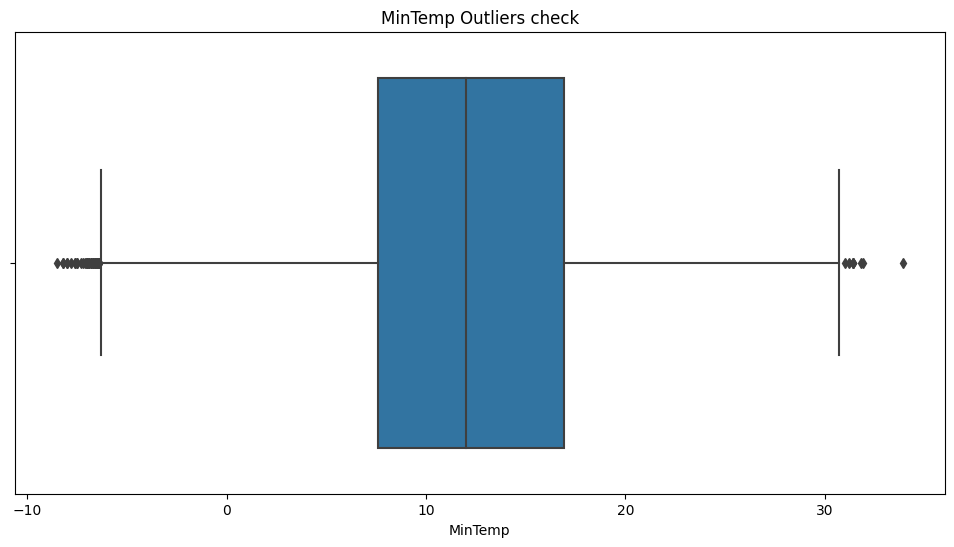

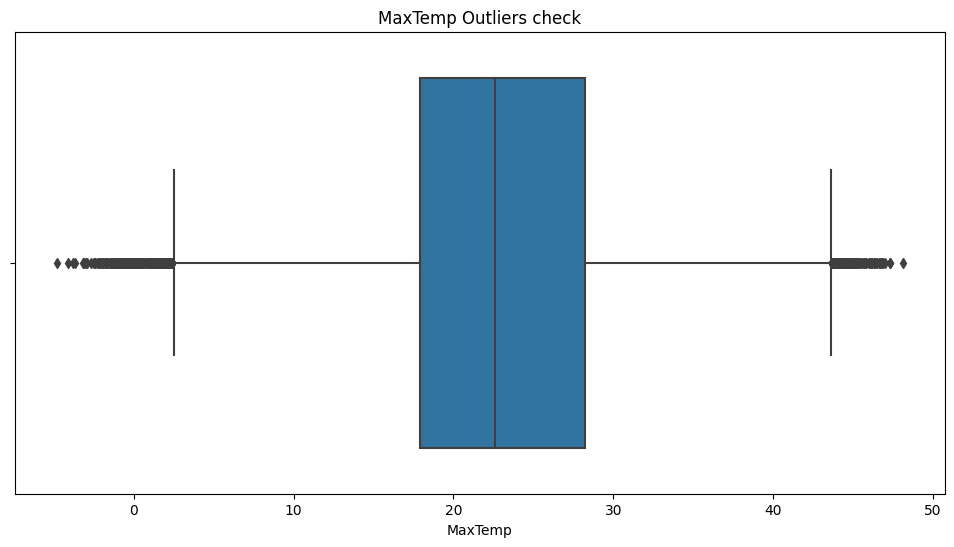

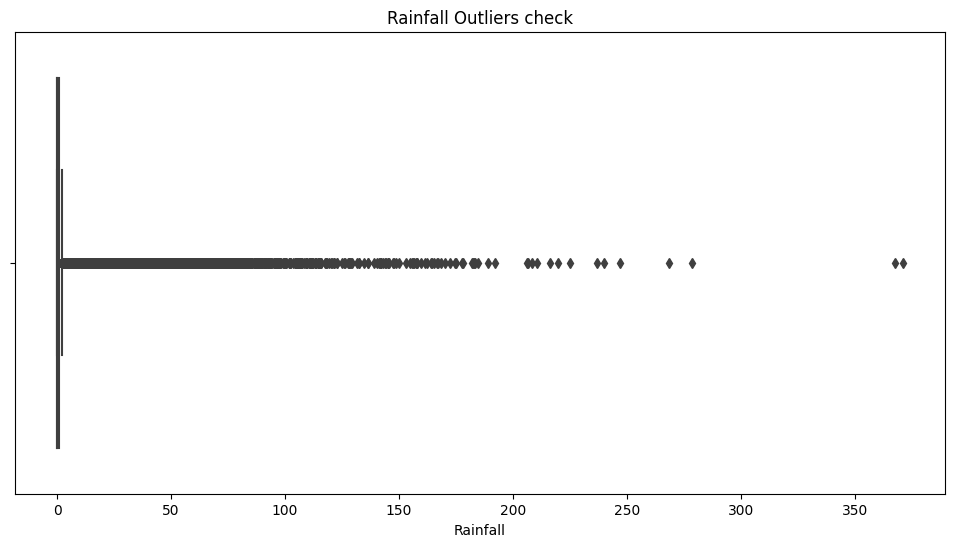

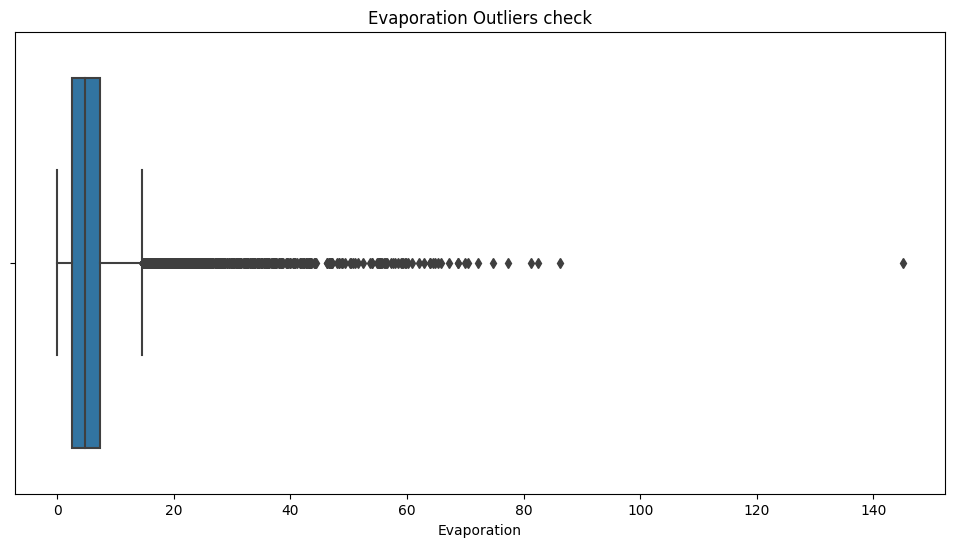

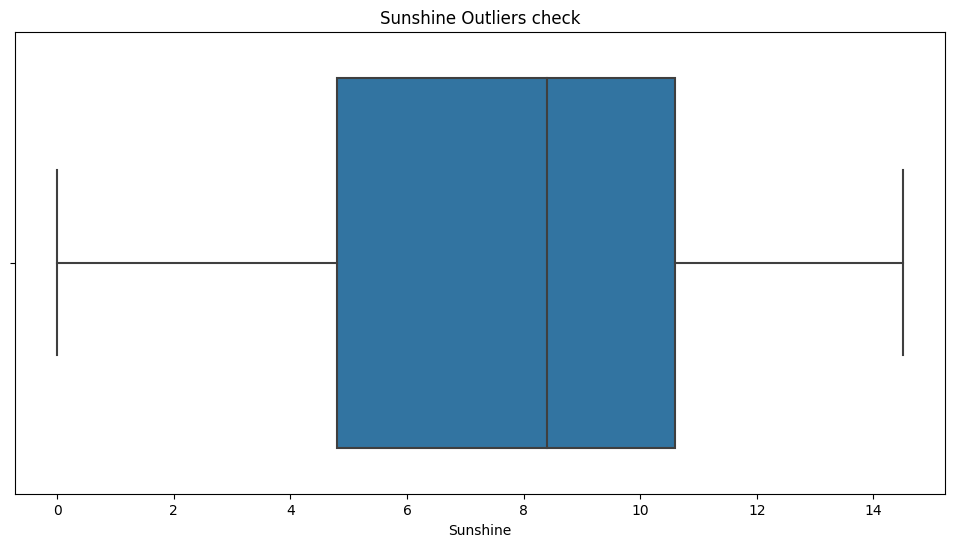

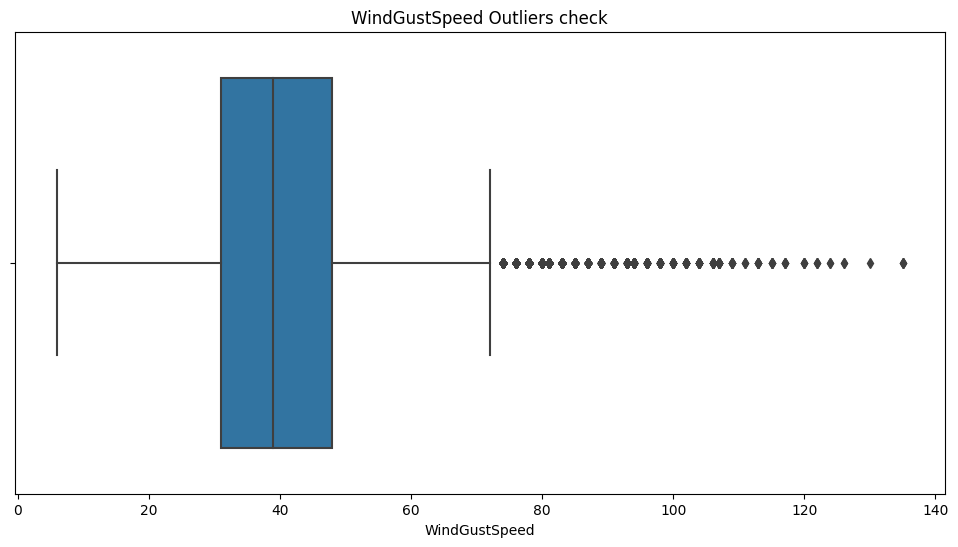

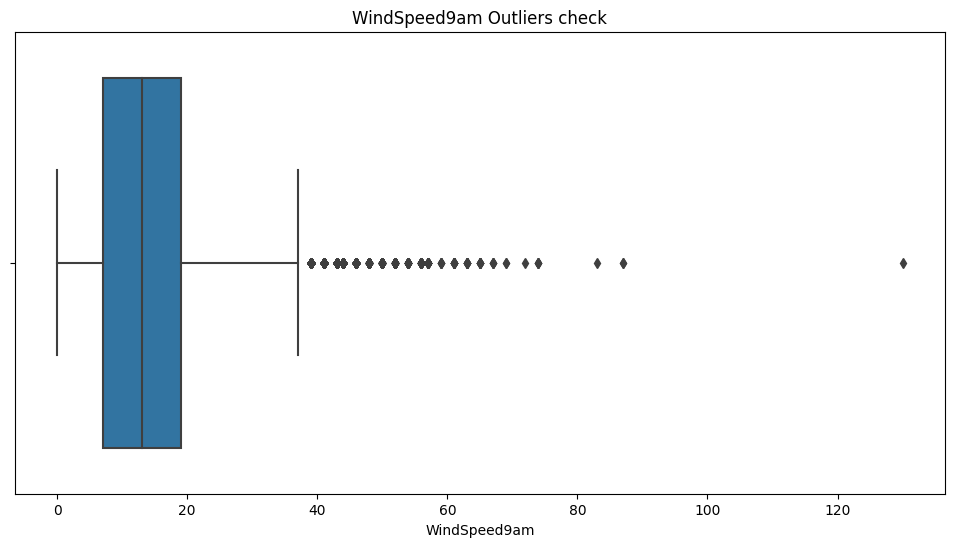

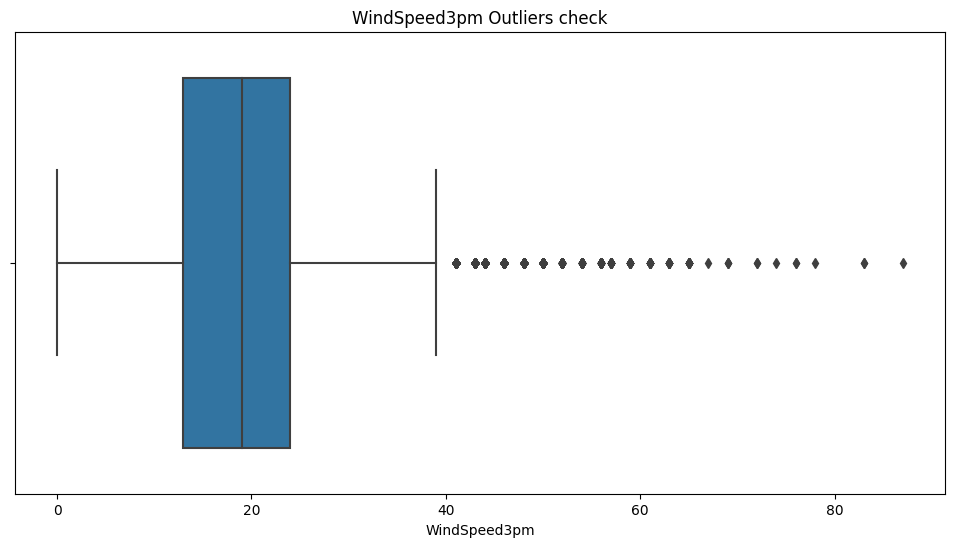

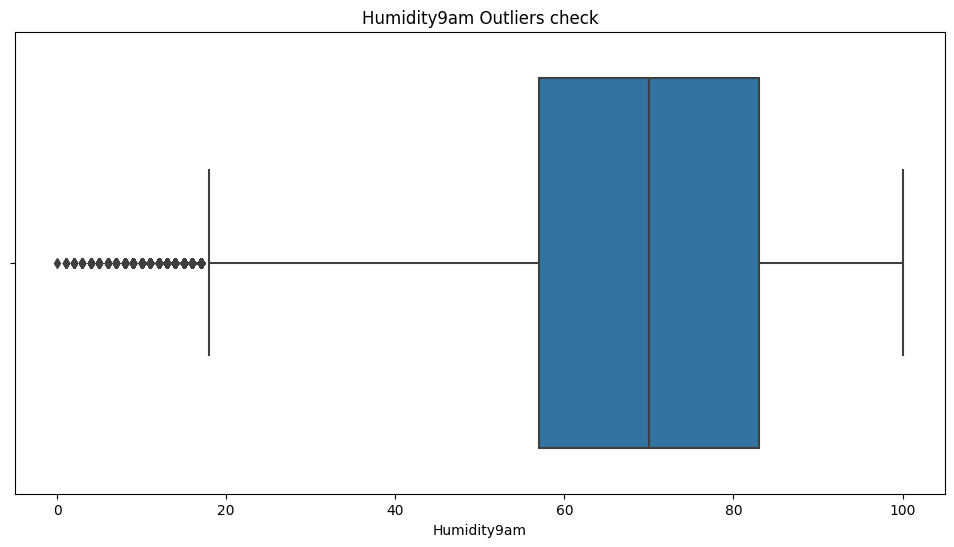

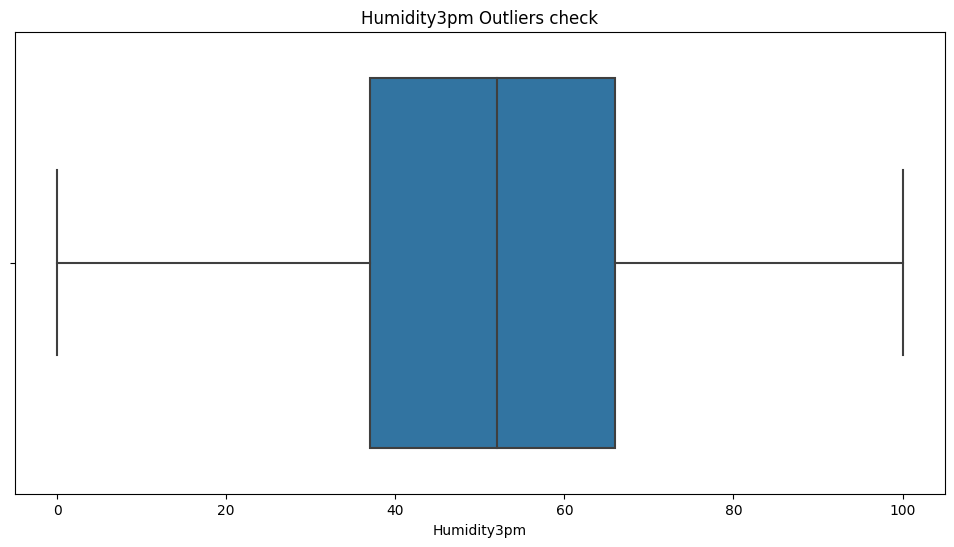

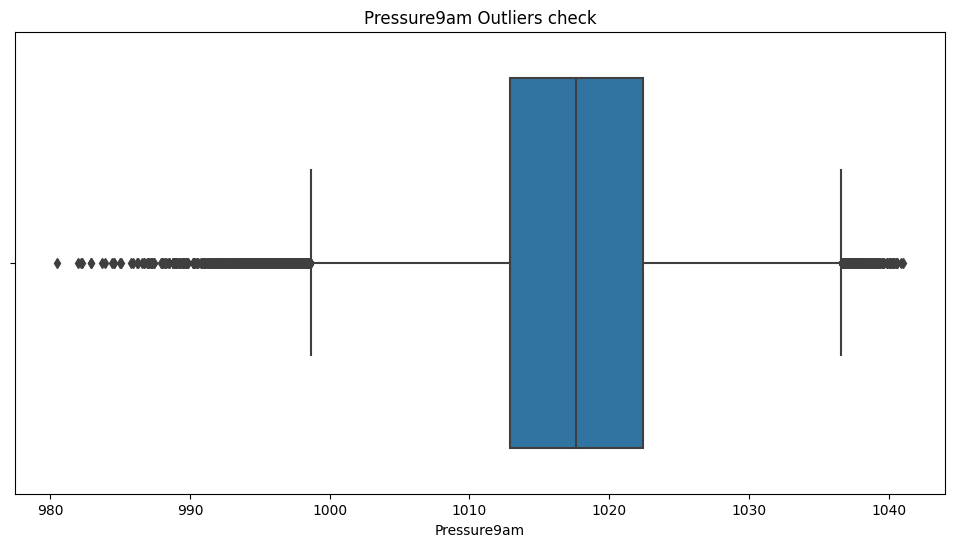

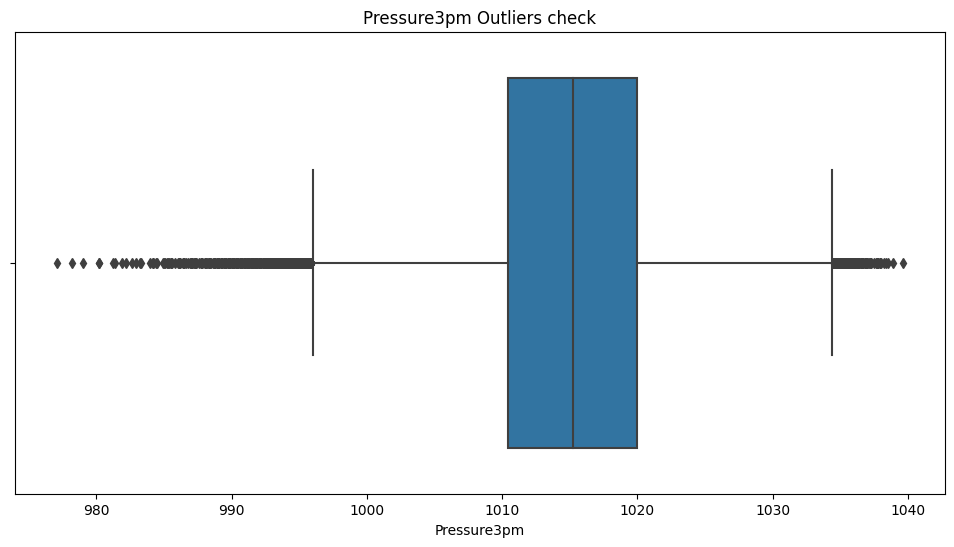

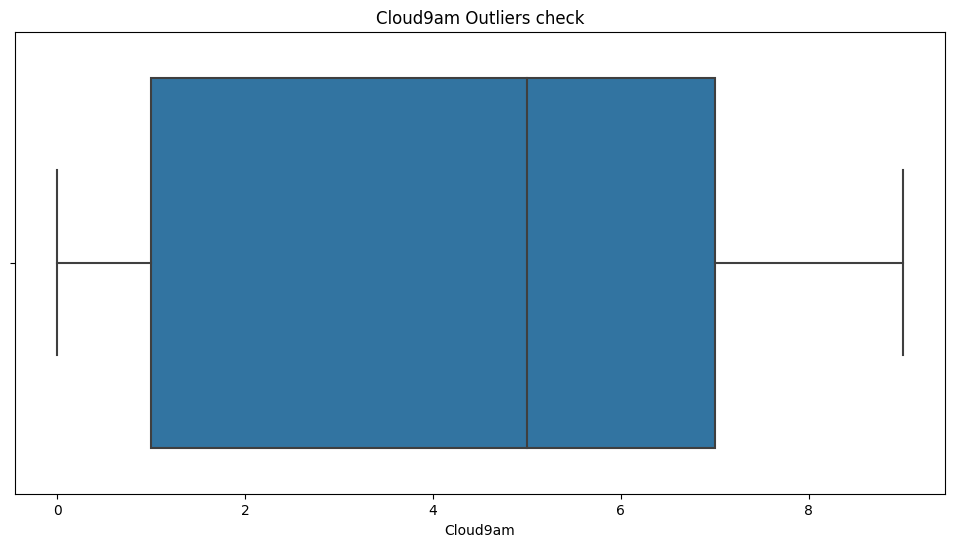

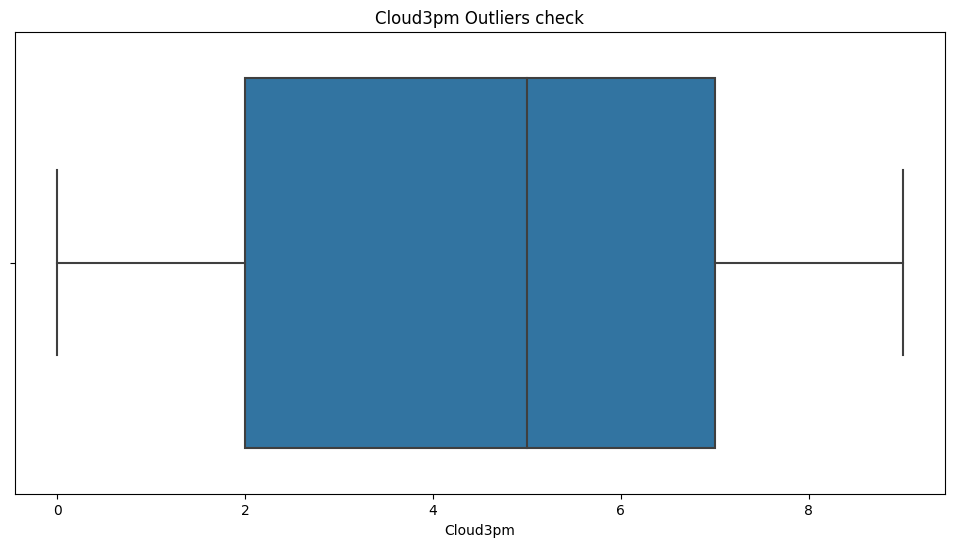

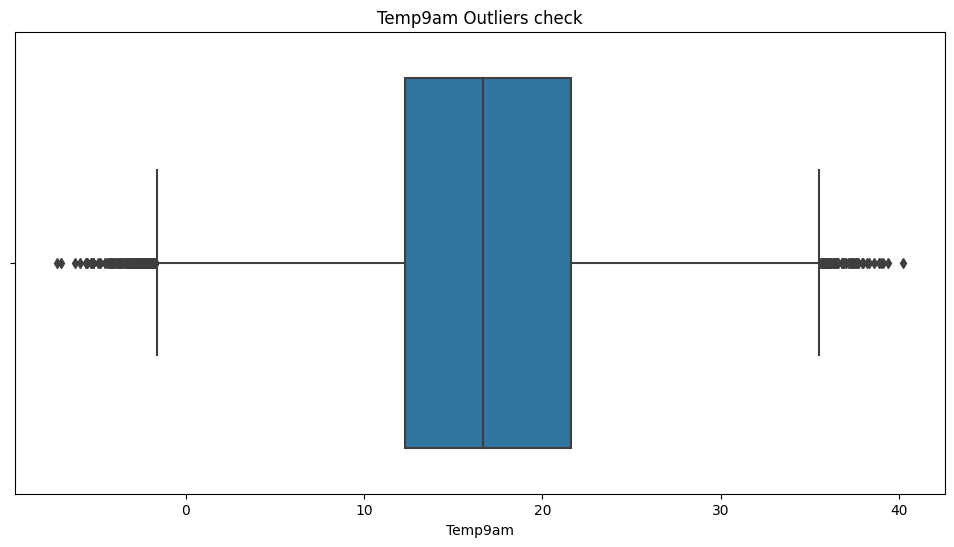

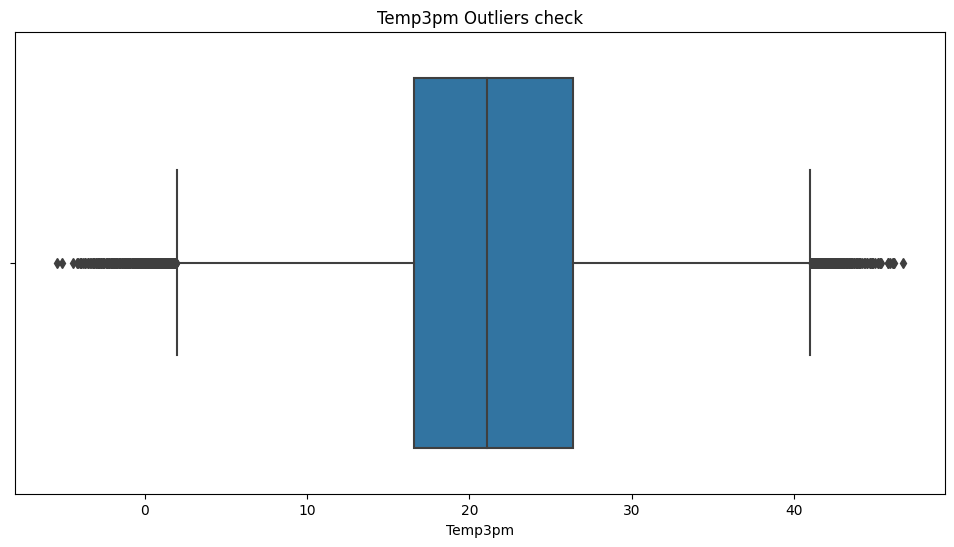

In [25]:
for col in df1.columns:
    if df[col].dtype == 'float64':
        box_plot(df, col)

There are a few outliers in the numeric columns but for the sake of the of the nature of the data, the study will not remove outliers.

# Exploratory Data Analysis
> In this phase, the study will investigate for trends and patterns within the data.

## Univariate Analysis

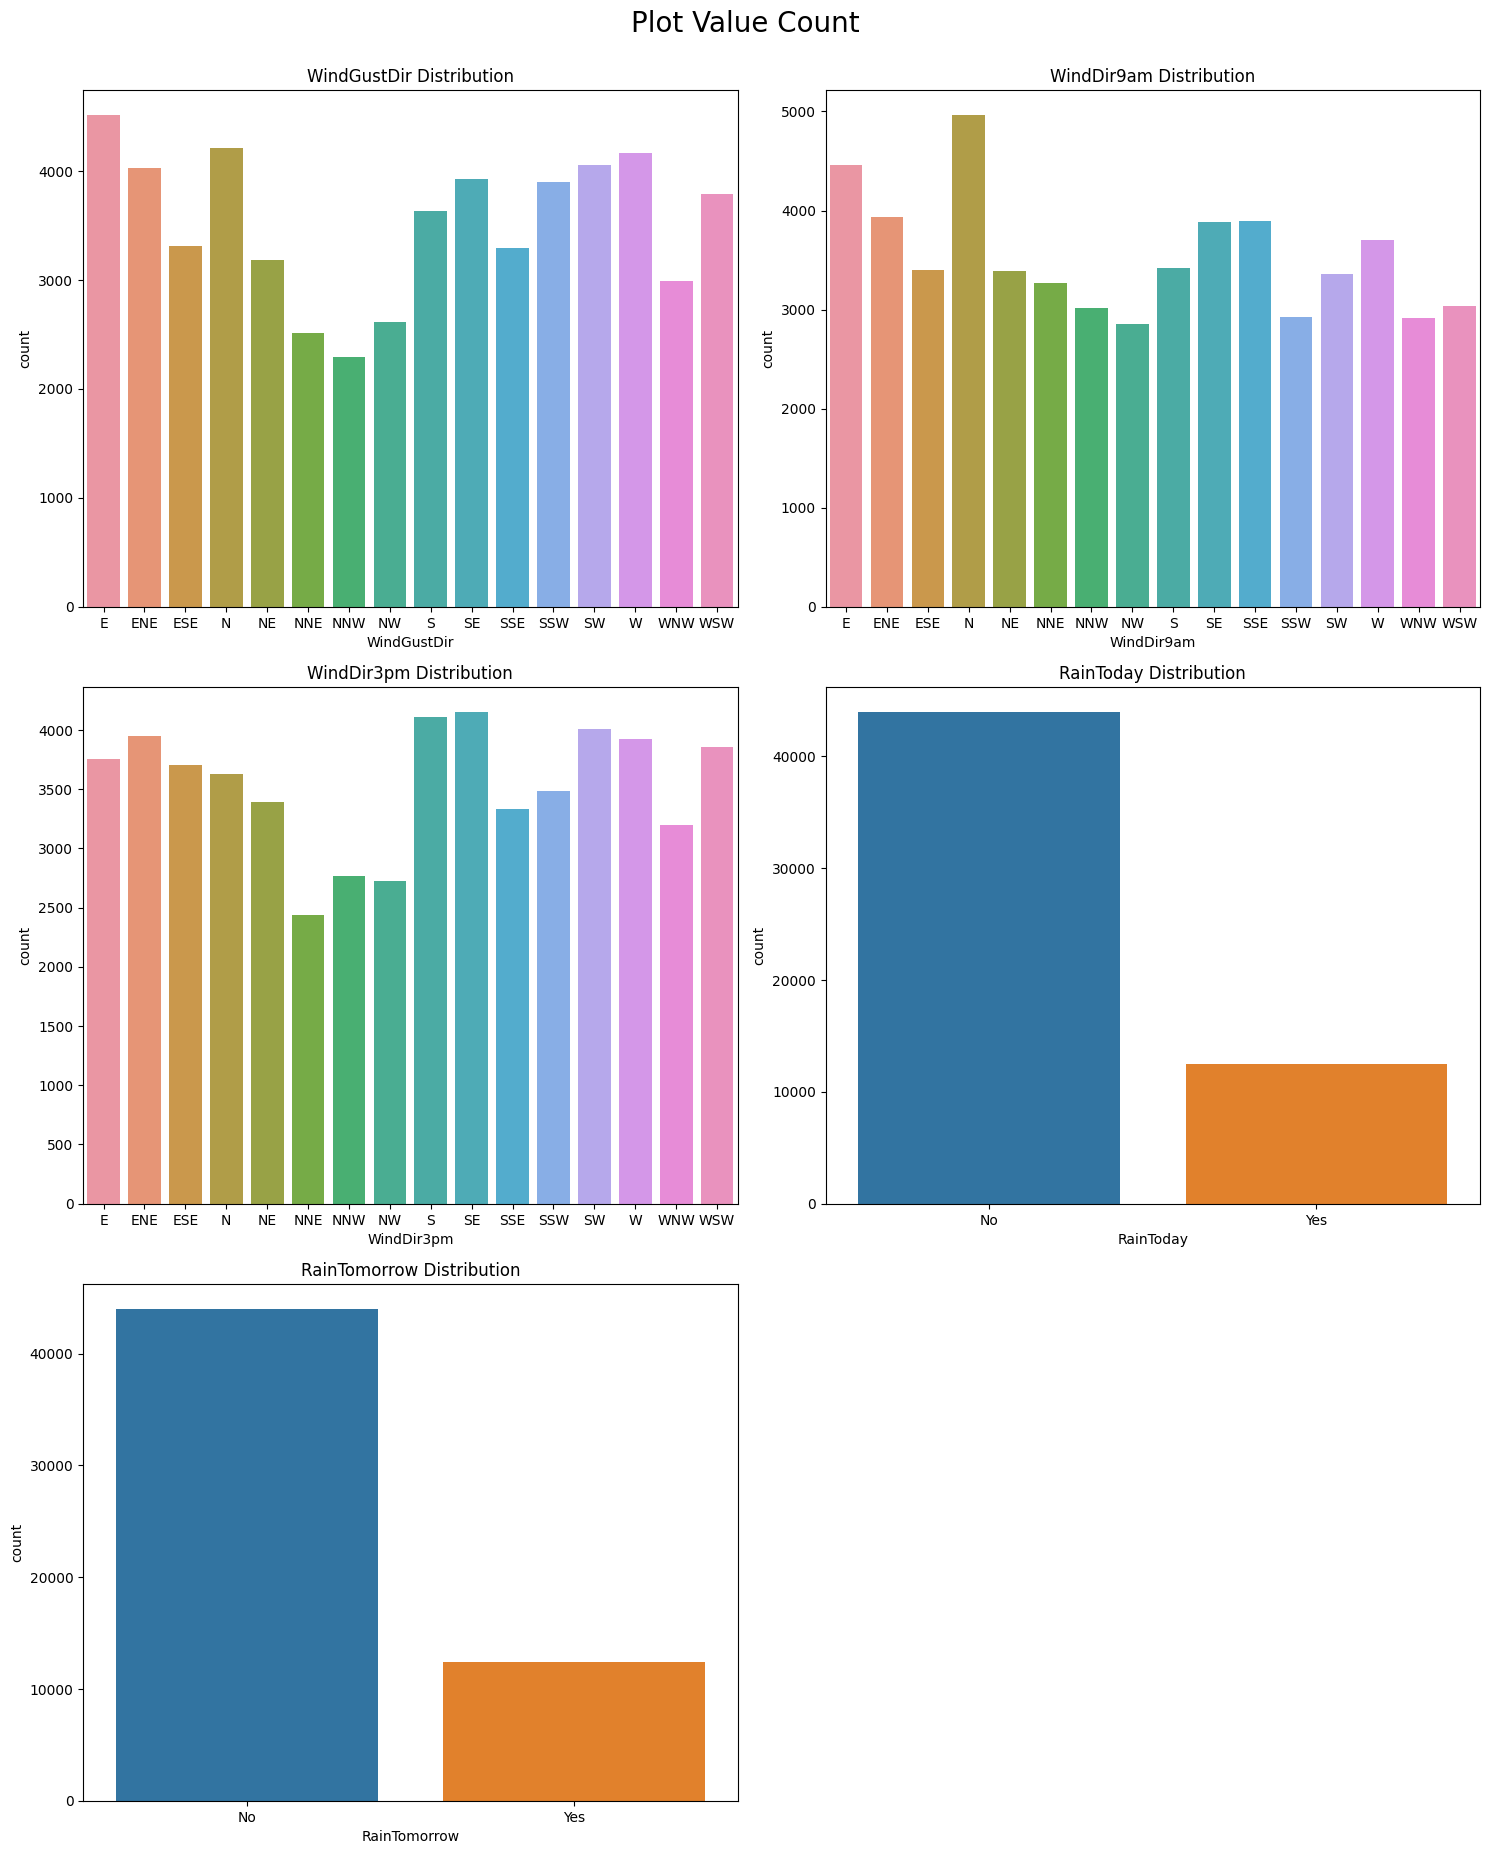

In [26]:
# Looking at each column using a loop
cat_cols = [col for col in df1.columns if df1[col].dtype == 'category' and col != 'Location']

# plotting cat cols distribution
plt.figure(figsize=(15,30))
for idx, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols), 2, idx+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df1, x=col)
    plt.title(f"{col} Distribution")
    plt.tight_layout()

## Bivariate Analysis
> Having the hue as rain today

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


<Figure size 1500x3000 with 0 Axes>

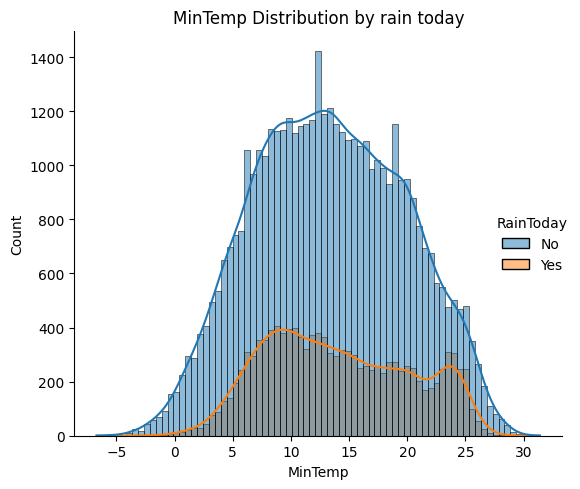

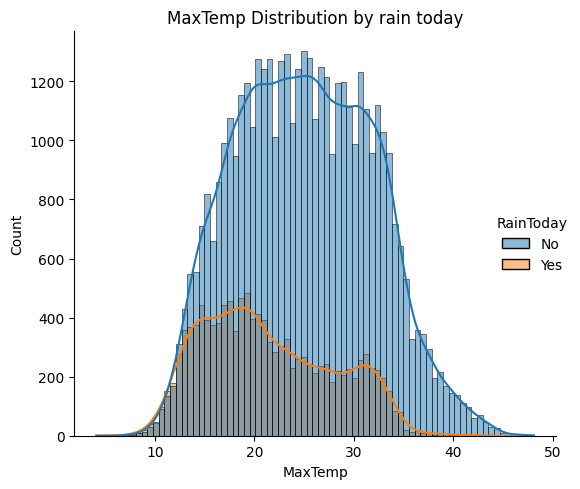

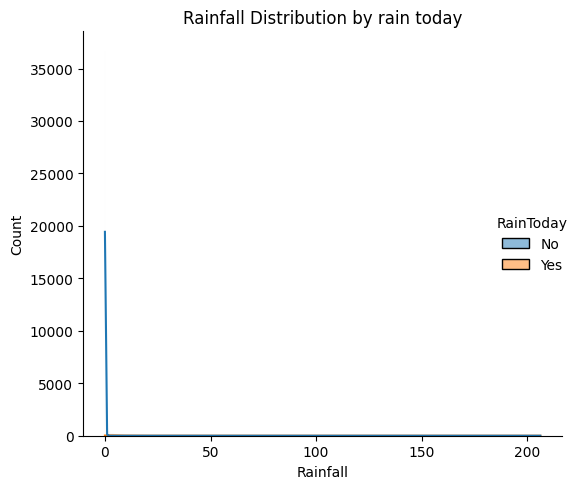

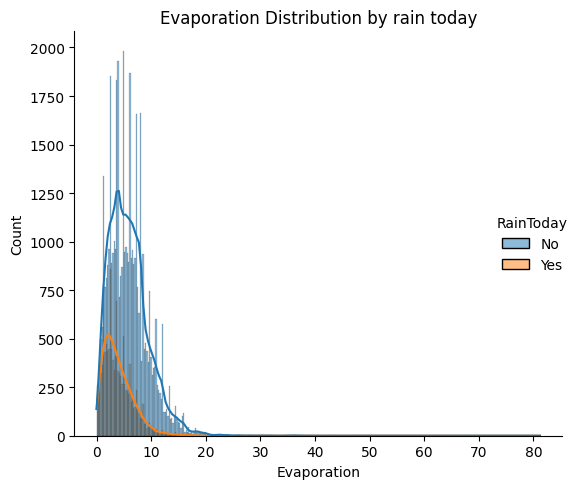

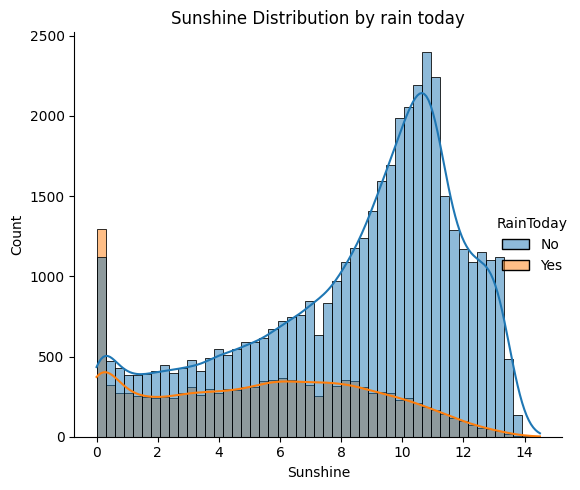

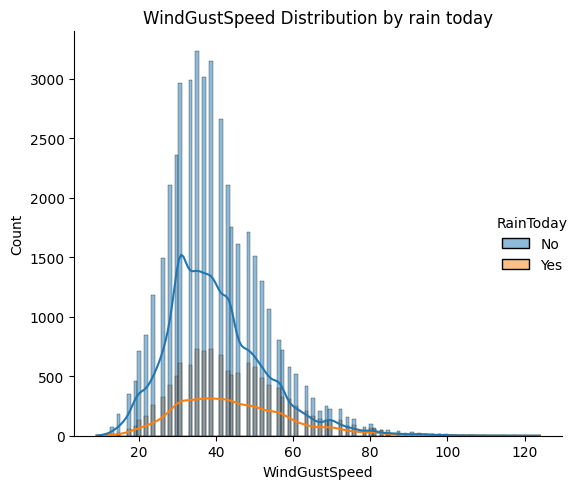

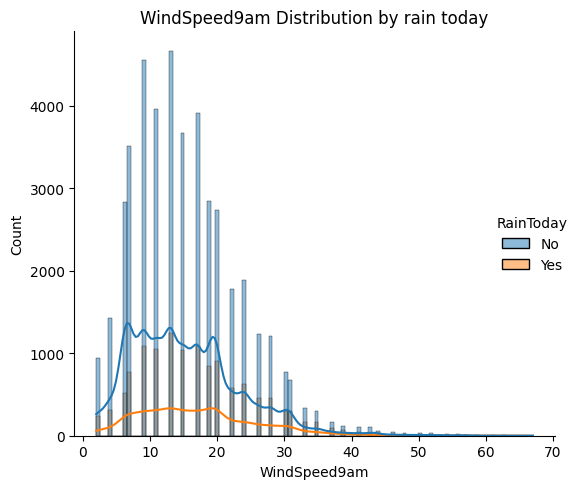

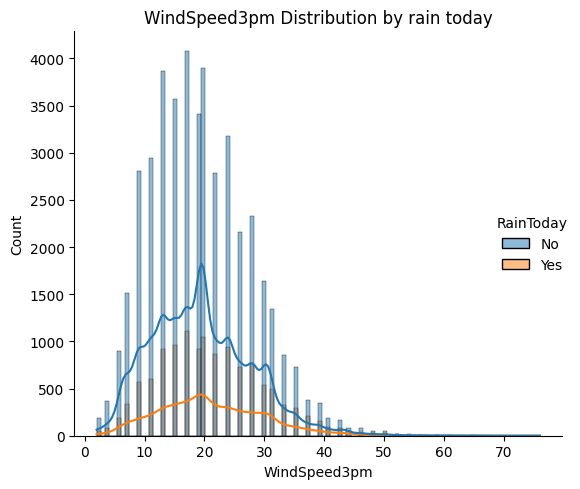

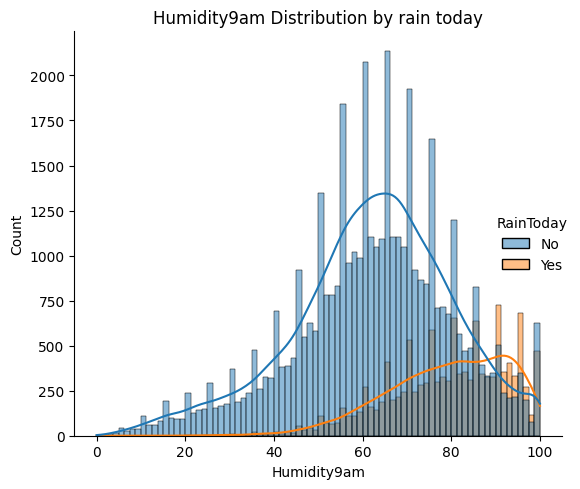

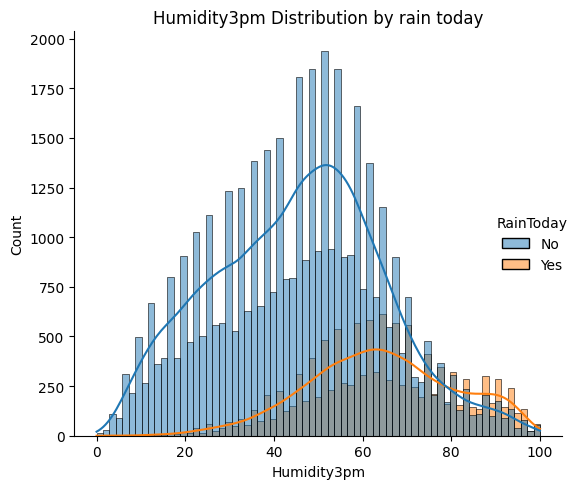

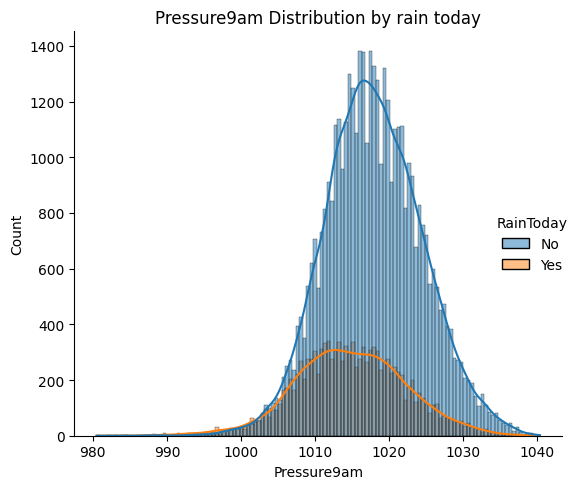

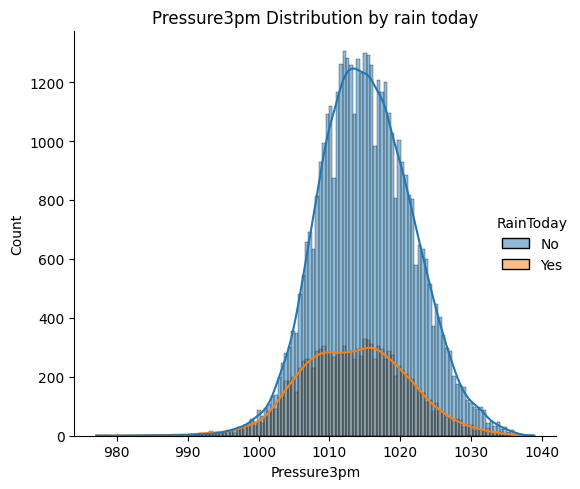

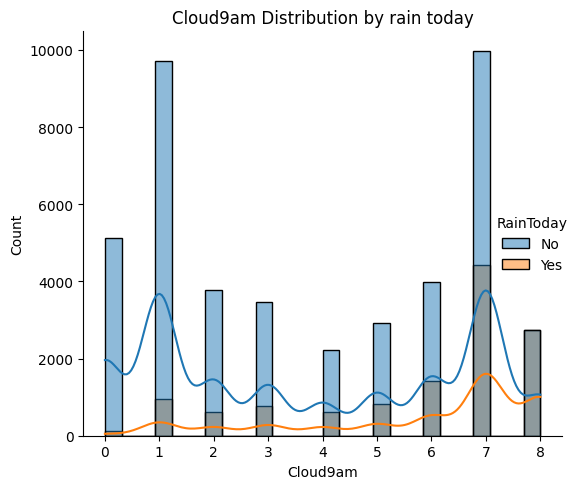

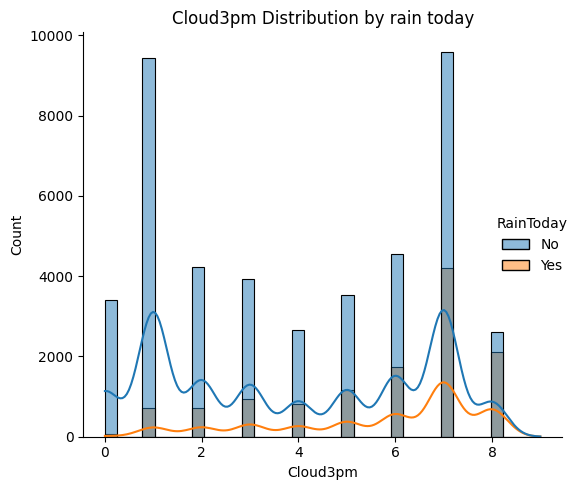

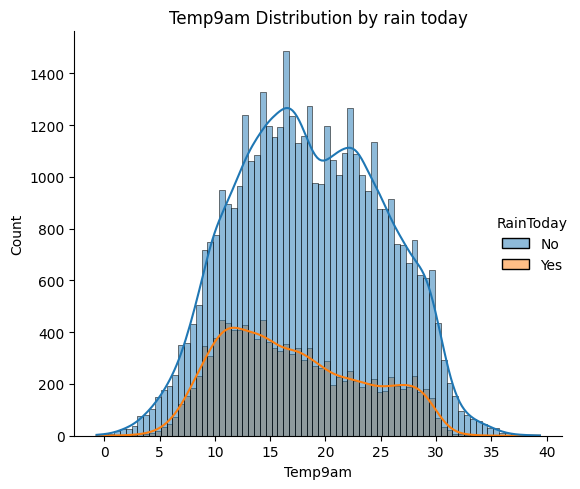

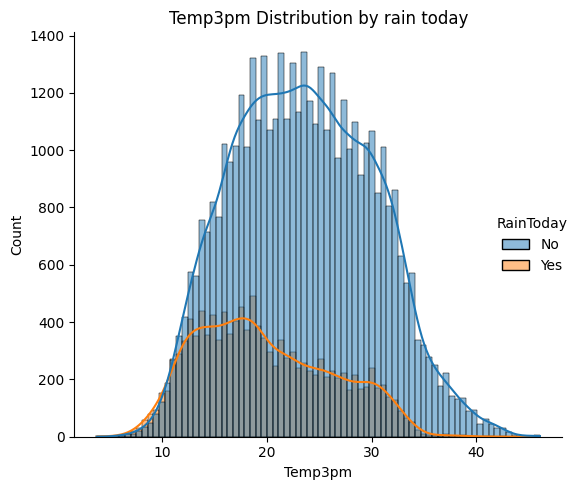

In [27]:
numeric_cols = [col for col in df1.columns if df1[col].dtype == 'float64']
print(numeric_cols)
# plotting the distribution of numeric columns
plt.figure(figsize=(15,30))
for idx, col in enumerate(numeric_cols):
    sns.displot(data=df1, x=col, hue = 'RainToday', kde=True)
    plt.title(f"{col} Distribution by rain today")
    plt.tight_layout()

In [28]:
# fig = px.choropleth(df1, locations="Location",
#                     color="MaxTemp",
#                     hover_name="Location",
#                     animation_frame="RainToday",
#                     title = "Maximum Temparature per region",
#                     scope ='asia',  color_continuous_scale=px.colors.sequential.PuRd)
 
# fig["layout"].pop("updatemenus")
# fig.show()

### By Location

In [29]:
# Creating data frames for the various aspects of weather
windspd, humid, press, temp = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

# Using groupby in a for loop to differentiate the various aspects by location
for col in ['WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
            'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'MaxTemp', 'MinTemp']:
    
    # populating windspd
    if col == 'WindSpeed9am' or col == 'WindSpeed3pm':
        windspd = df1.groupby(['Location'])['WindSpeed9am', 'WindSpeed3pm'].mean()
        windspd = windspd.reset_index()
        
    # populating humid
    elif col == 'Humidity9am' or col == 'Humidity3pm':
        humid = df1.groupby(['Location'])['Humidity9am', 'Humidity3pm'].mean()
        humid = humid.reset_index()
    
    # populating press
    elif col == 'Pressure9am' or col == 'Pressure3am':
        press = df1.groupby(['Location'])['Pressure9am', 'Pressure3pm'].mean()
        press = press.reset_index()
        
    # populating temp
    elif col == 'Temp9am' or col == 'Temp3am':
        temp = df1.groupby(['Location'])['Temp9am', 'Temp3pm', 'MaxTemp', 'MinTemp'].mean()
        temp = temp.reset_index()
# previewing temp
temp.head()

,Location,Temp9am,Temp3pm,MaxTemp,MinTemp
0,AliceSprings,22.043140,28.457175,29.724921,13.878093
1,Brisbane,21.815137,24.746834,26.436810,16.365628
2,Cairns,25.790139,27.872013,29.551596,21.129296
3,Canberra,12.839239,18.917254,20.363822,7.727829
4,Cobar,18.523783,24.873034,26.225281,13.828090


#### Wind speed per location

In [30]:
def make_plots(df, x_col, y1, y2, factor:str):
    """A function that plots the various elements of 
    the weather with respect to location"""
    x = df.loc[:, x_col]
    y_1 = df.loc[:, y1]
    y_2 = df.loc[:, y2]
    
    plt.figure(figsize=(12,8))
    
    plt.plot(x, y_1, marker = 'D', color = 'blue', label = y1)
    plt.plot(x, y_2, marker = 'D', color = 'red', label = y2)
    
    plt.xlabel(x_col, fontsize = 14)
    plt.ylabel(factor, fontsize = 14)
    plt.title(f'Location-wise observation of Average {factor}', fontsize = 18)
    plt.legend(fontsize = 10, loc = 'best')
    plt.xticks(rotation=80)
    plt.show()
    

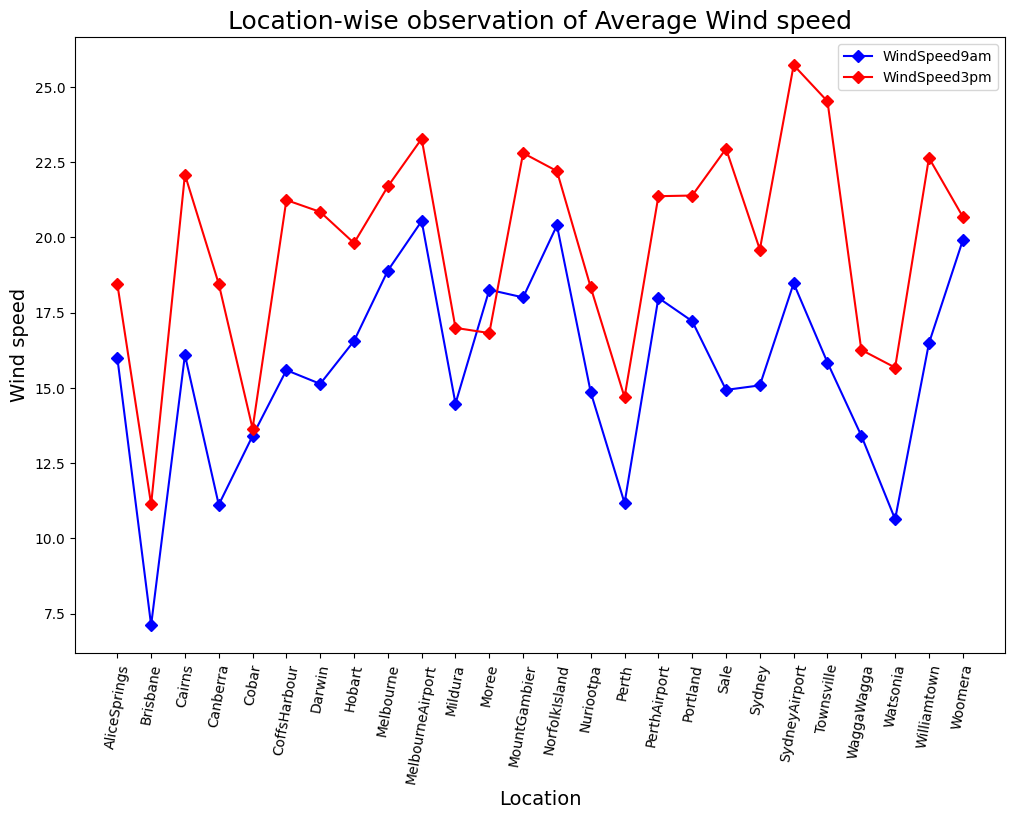

In [31]:
make_plots(windspd, 'Location', 'WindSpeed9am', 'WindSpeed3pm', 'Wind speed')


### Humidity per Location

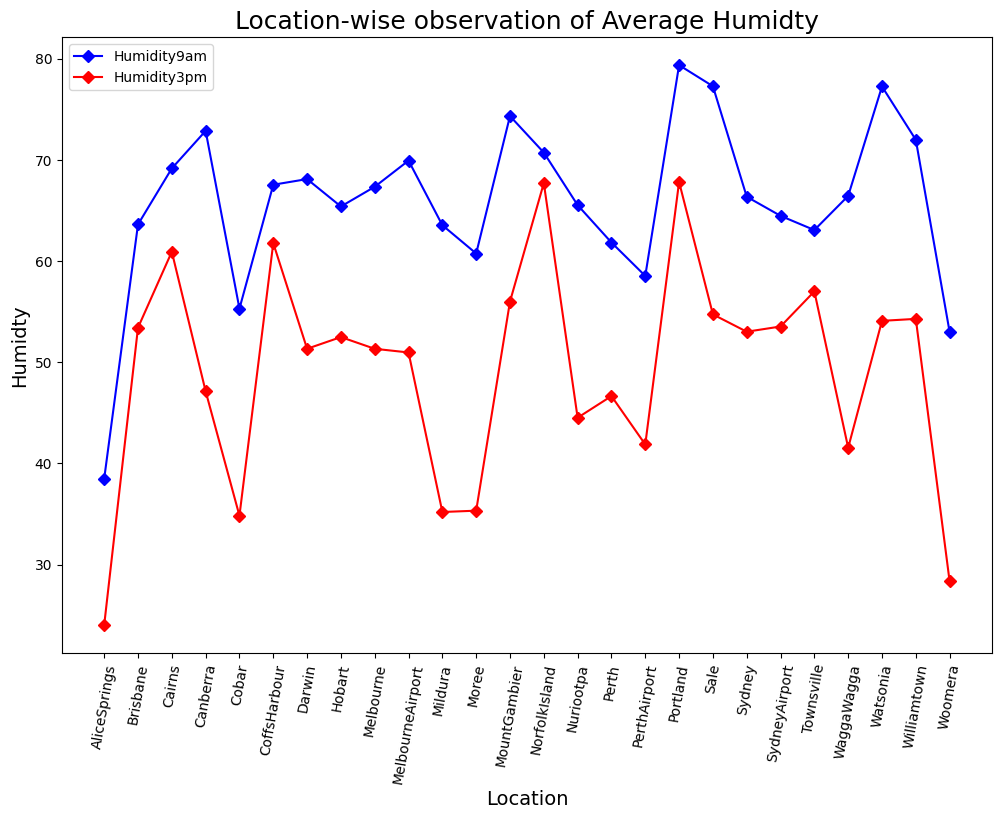

In [32]:
make_plots(humid, 'Location', 'Humidity9am', 'Humidity3pm', 'Humidty')

### Pressure by Location

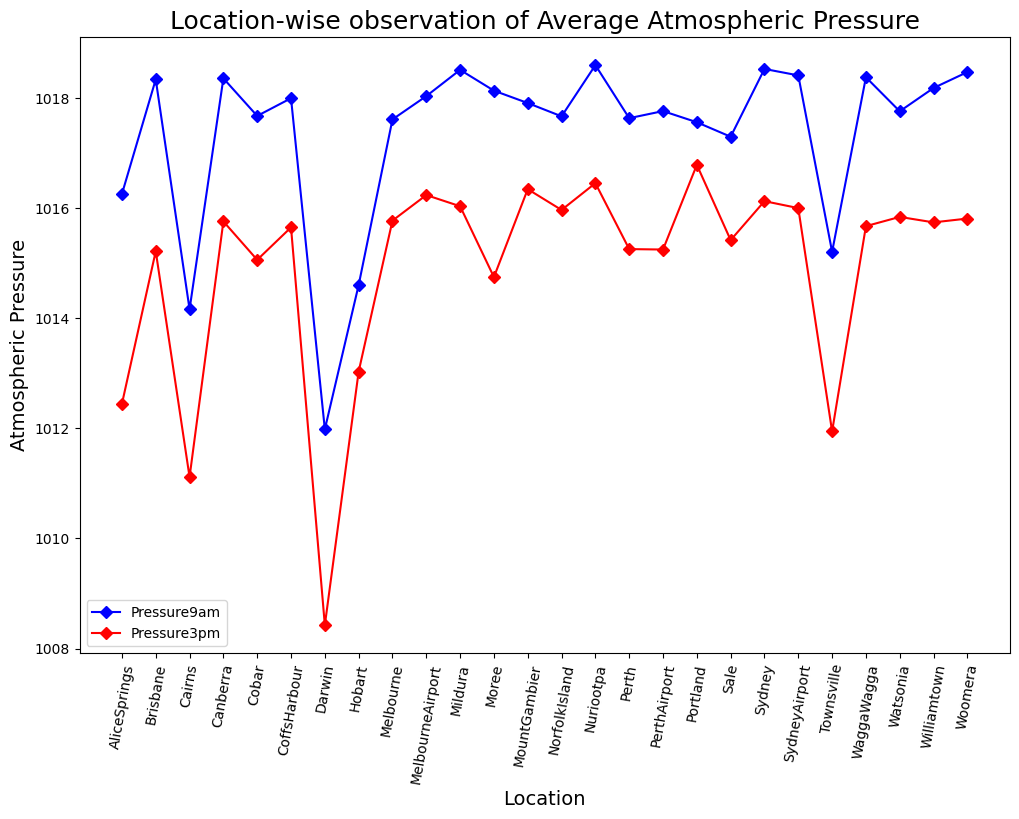

In [33]:
make_plots(press, 'Location', 'Pressure9am', 'Pressure3pm', 'Atmospheric Pressure')

### Temperature by Location

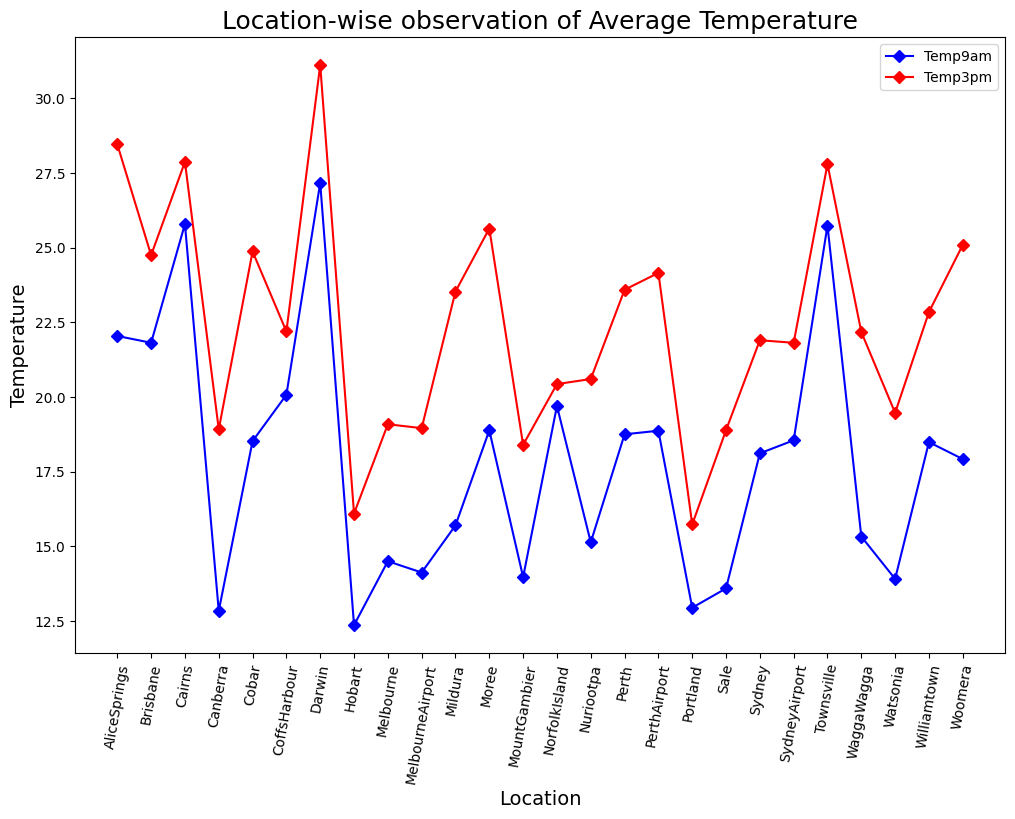

In [34]:
make_plots(temp, 'Location', 'Temp9am', 'Temp3pm', 'Temperature')

## Multivariate Data Analysis

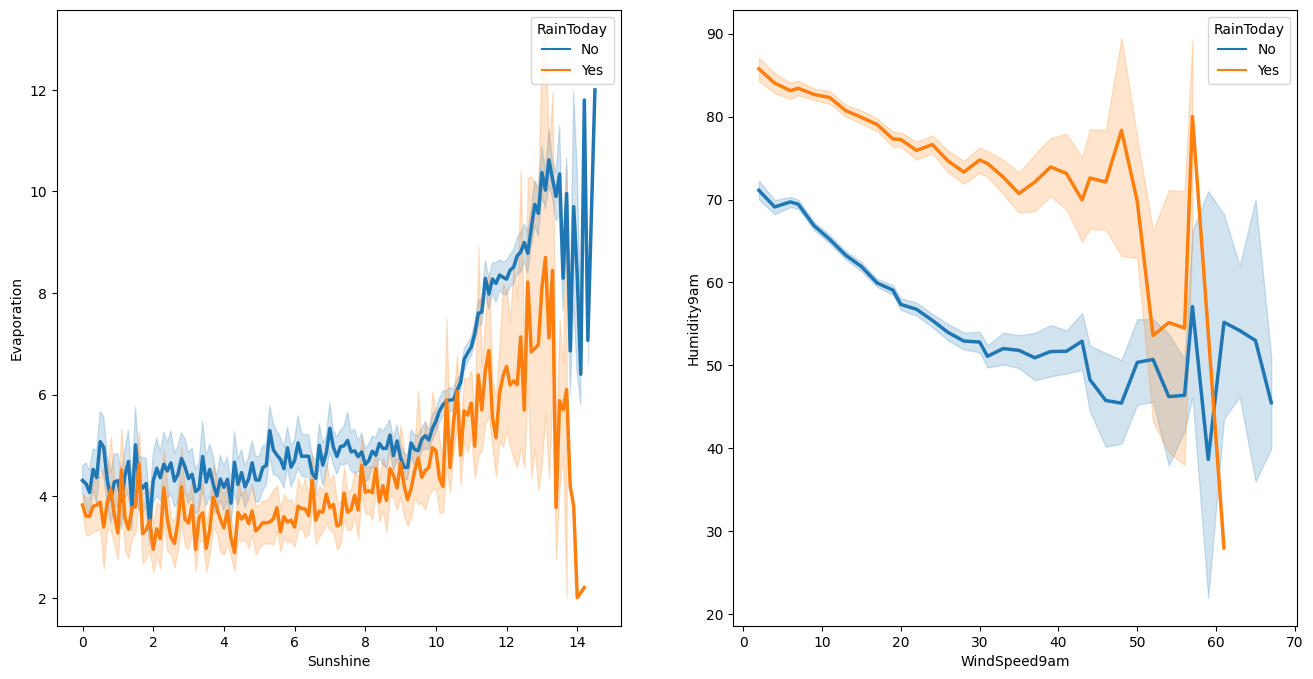

In [35]:
# Plotting the related variables against each other
fig = plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
sns.lineplot(x="Sunshine",y="Evaporation",hue="RainToday",data=df1, palette="tab10", linewidth=2.5)
plt.subplot(1,2,2)
sns.lineplot(x="WindSpeed9am",y="Humidity9am",hue="RainToday",data=df1, palette="tab10", linewidth=2.5)
plt.show()

# Time Series Analysis for Perth

In [36]:
import pandas.tseries as ts
import statsmodels.api as sm

In [37]:
perth = df1.loc[df['Location'] == 'Perth']
perth

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
120639,2008-07-02,Perth,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,No,No
120641,2008-07-04,Perth,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,Yes,Yes
120642,2008-07-05,Perth,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,Yes,Yes
120643,2008-07-06,Perth,0.7,15.9,6.8,2.4,9.3,NNE,24.0,ENE,...,86.0,41.0,1032.0,1029.6,0.0,1.0,6.9,15.5,Yes,No
120644,2008-07-07,Perth,0.7,18.3,0.0,0.8,9.3,N,37.0,NE,...,72.0,36.0,1028.9,1024.2,1.0,5.0,8.7,17.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123826,2017-06-21,Perth,10.3,19.9,0.2,1.8,7.5,NW,37.0,NNE,...,89.0,60.0,1017.1,1013.8,5.0,6.0,13.0,18.5,No,Yes
123827,2017-06-22,Perth,13.0,16.8,61.2,3.6,0.0,SSW,46.0,W,...,90.0,75.0,1005.6,1008.9,7.0,7.0,16.4,15.6,Yes,No
123828,2017-06-23,Perth,13.3,18.9,0.4,1.8,6.5,SE,37.0,SE,...,85.0,65.0,1019.2,1019.4,6.0,6.0,15.1,18.0,No,No
123829,2017-06-24,Perth,11.5,18.2,0.0,3.8,9.3,SE,30.0,ESE,...,62.0,47.0,1025.9,1023.4,1.0,3.0,14.0,17.6,No,No


In [38]:
# Run this cell without changes

# Confirm that date values are used for indexing purpose in the CO2 dataset 
if isinstance(perth.index, pd.DatetimeIndex):
    perth.index.name = 'Date'
else:
    perth.rename(columns={'index':'Date'}, inplace=True)
    perth.set_index('Date', inplace=True)
    
perth.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-07-02,Perth,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,ENE,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,No,No
2008-07-04,Perth,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,NNW,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,Yes,Yes
2008-07-05,Perth,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,SW,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,Yes,Yes
2008-07-06,Perth,0.7,15.9,6.8,2.4,9.3,NNE,24.0,ENE,NE,...,86.0,41.0,1032.0,1029.6,0.0,1.0,6.9,15.5,Yes,No
2008-07-07,Perth,0.7,18.3,0.0,0.8,9.3,N,37.0,NE,NNE,...,72.0,36.0,1028.9,1024.2,1.0,5.0,8.7,17.9,No,No


In [39]:
# Group the time series into monthly buckets
perth_monthly = perth.resample('MS')

# Take the mean of each group 
perth_monthly_mean = perth_monthly.mean()

# Display the first 10 elements of resulting time series
perth_monthly_mean.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Date,,,,,,,,,,,,,,,,
2008-07-01,7.503704,17.896296,5.770370,1.970370,4.788889,37.296296,11.296296,12.111111,81.185185,61.296296,1018.474074,1016.518519,4.666667,5.814815,11.962963,16.414815
2008-08-01,5.814815,19.881481,1.022222,3.192593,8.666667,32.074074,10.740741,12.962963,61.555556,40.407407,1027.022222,1024.122222,2.777778,2.925926,12.462963,18.959259
2008-09-01,9.446429,20.532143,1.957143,3.564286,7.414286,38.928571,12.428571,16.500000,64.428571,51.071429,1018.457143,1016.507143,3.821429,4.035714,15.614286,19.117857
2008-10-01,12.125806,23.977419,1.238710,5.225806,8.858065,37.838710,13.129032,17.290323,58.451613,47.225806,1019.425806,1017.490323,4.322581,3.903226,18.645161,22.045161
2008-11-01,12.446667,23.563333,1.926667,5.946667,10.233333,38.600000,12.033333,16.800000,61.566667,46.500000,1014.180000,1012.426667,3.166667,4.233333,17.820000,21.983333
2008-12-01,15.121429,26.835714,0.414286,7.950000,11.553571,39.857143,11.357143,19.607143,60.428571,43.428571,1012.900000,1011.210714,2.928571,2.500000,19.803571,25.385714
2009-01-01,18.644444,32.170370,0.007407,10.192593,11.192593,40.740741,11.703704,18.074074,55.481481,38.703704,1012.911111,1010.474074,2.481481,2.407407,23.070370,30.507407
2009-02-01,17.996429,31.771429,0.292857,9.107143,10.832143,39.642857,13.678571,16.678571,57.250000,37.535714,1012.032143,1009.825000,2.857143,2.571429,22.232143,29.800000
2009-03-01,15.341379,28.937931,0.234483,7.220690,9.572414,36.172414,10.793103,14.827586,61.103448,36.137931,1016.906897,1014.696552,3.310345,2.931034,19.524138,27.679310


In [40]:
perth_monthly_mean.isna().sum()

MinTemp          3
MaxTemp          3
Rainfall         3
Evaporation      3
Sunshine         3
WindGustSpeed    3
WindSpeed9am     3
WindSpeed3pm     3
Humidity9am      3
Humidity3pm      3
Pressure9am      3
Pressure3pm      3
Cloud9am         3
Cloud3pm         3
Temp9am          3
Temp3pm          3
dtype: int64

In [41]:
# Filling missing values with a previous valid value
perth_monthly_mean = perth_monthly_mean.bfill()

# Checking for missing values once more
perth_monthly_mean.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [42]:
perth_monthly_rain = perth_monthly_mean['Rainfall']

# Previewing perth rainfall
perth_monthly_rain = pd.DataFrame(perth_monthly_rain)
perth_monthly_rain

,Rainfall
Date,
2008-07-01,5.770370
2008-08-01,1.022222
2008-09-01,1.957143
2008-10-01,1.238710
2008-11-01,1.926667
...,...
2017-02-01,4.900000
2017-03-01,0.761290
2017-04-01,0.000000


<AxesSubplot: xlabel='Date'>

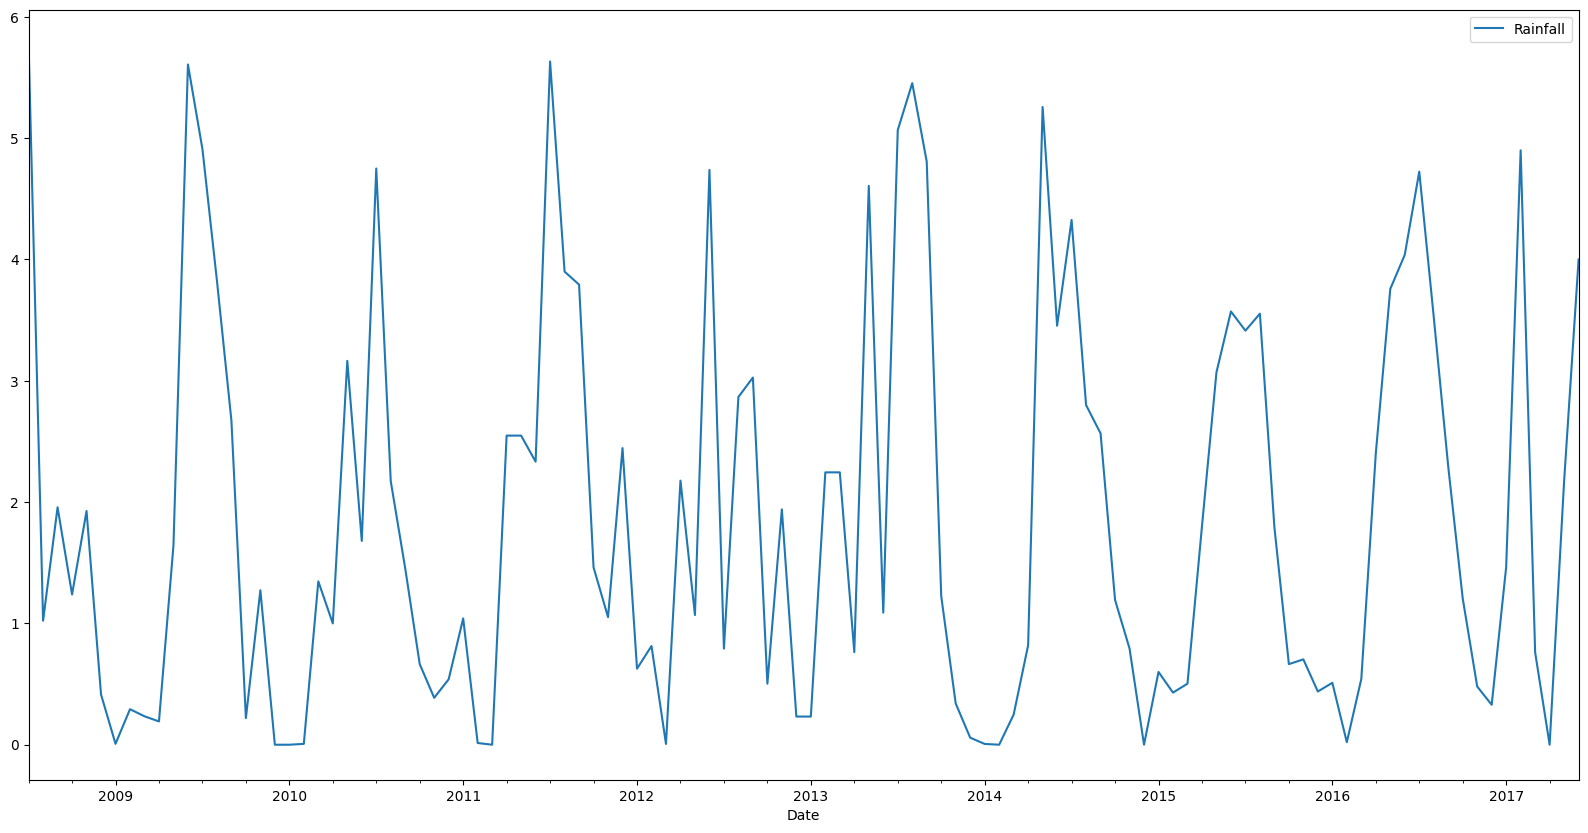

In [43]:
# Draw a line plot using perth_monthly_rain 
perth_monthly_rain.plot(figsize=(20,10))

In [44]:
# # Create a new DataFrame and store yearly values in columns
# year_groups = perth_monthly_rain.groupby(pd.Grouper(freq='a'))
# year_groups

# rain_annual = pd.DataFrame()


# # Plot the yearly groups as subplots
# for yr, group in year_groups:
#     rain_annual[yr.year] = group.values.ravel()

# # Yearly temp values
# rain_annual.plot(figsize = (6,8), subplots=True, legend=True);

<AxesSubplot: ylabel='Density'>

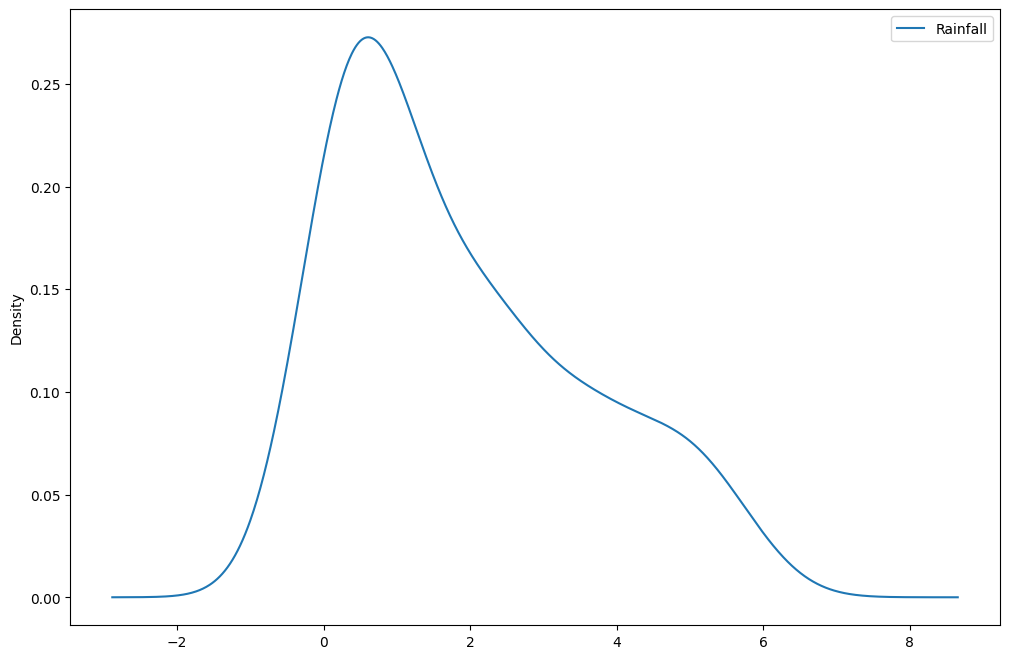

In [45]:
# Plot a density plot for rainfall
perth_monthly_rain.plot(kind='kde', figsize=(12,8))

## Testing for Trends
### Rolling Statistics

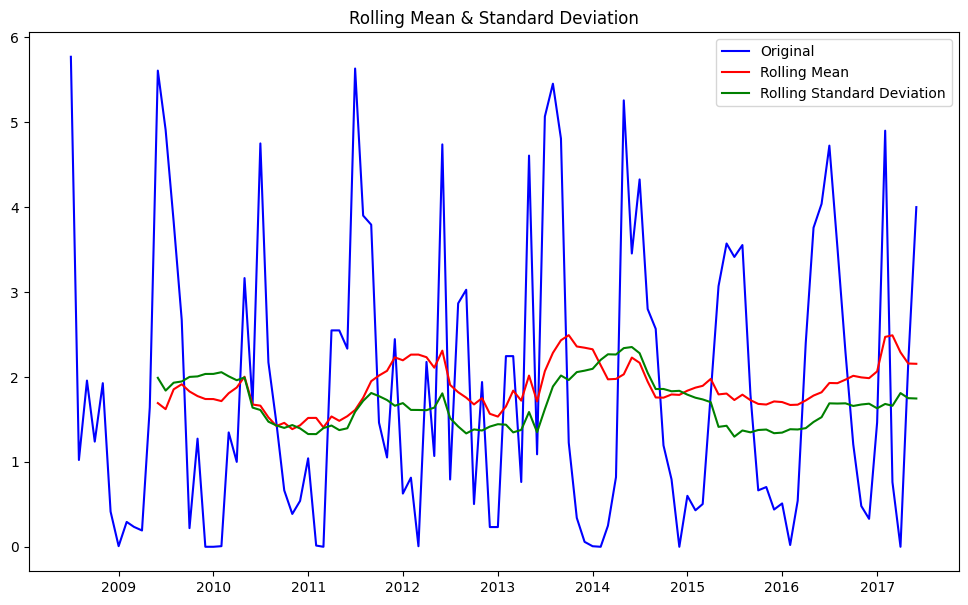

In [46]:
# Declaring the data as time series data
ts = perth_monthly_rain

# Determine rolling statistics
ts_mean = ts.rolling(window=12, center=False).mean()
ts_std = ts.rolling(window=12, center=False).std()

# Plot rolling statistics
fig = plt.figure(figsize=(12,7))
plt.plot(ts, color='b', label='Original')
plt.plot(ts_mean, color='r', label='Rolling Mean')
plt.plot(ts_std, color='g', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [47]:
def stationarity_check(TS, w:int):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=w, center=False).mean()
    roll_std = TS.rolling(window=w, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    print()
    if dfoutput['p-value'] > 0.05:
        print("The data is non-stationary")
    else:
        print("The data is stationary")
    
    return None

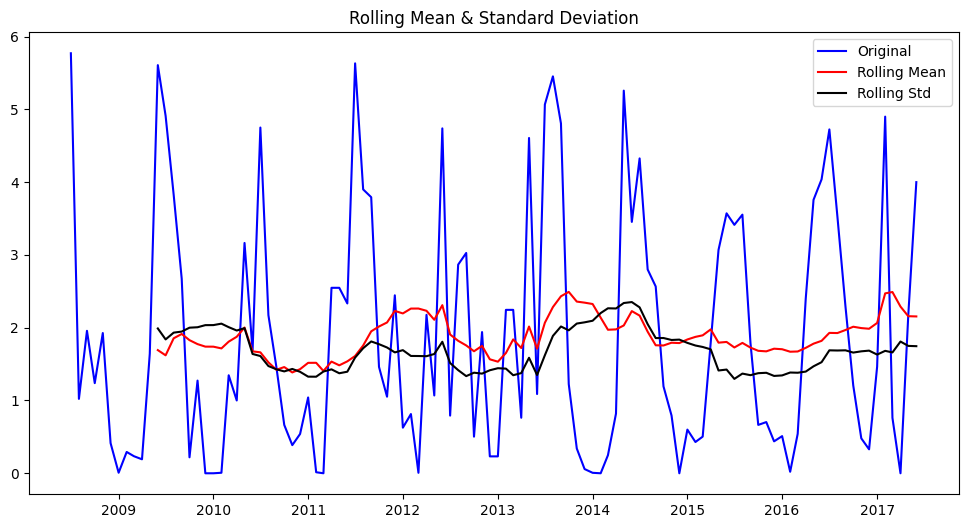

Results of Dickey-Fuller Test: 

Test Statistic                -7.960692e+00
p-value                        2.954155e-12
#Lags Used                     6.000000e+00
Number of Observations Used    1.010000e+02
Critical Value (1%)           -3.496818e+00
Critical Value (5%)           -2.890611e+00
Critical Value (10%)          -2.582277e+00
dtype: float64

The data is stationary


In [48]:
stationarity_check(ts, 12)

### Time Series Decomposition

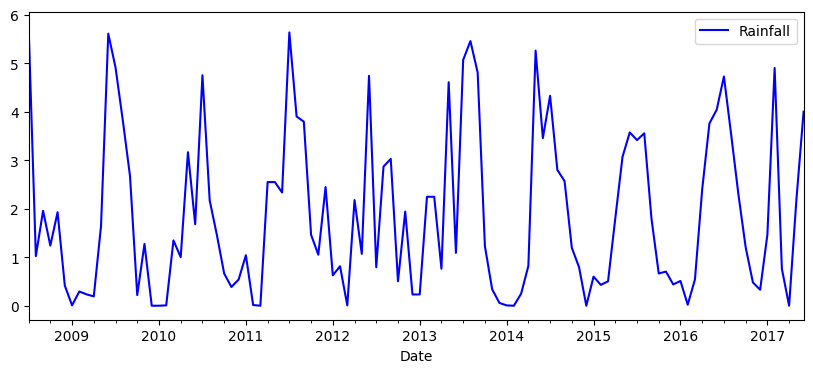

In [49]:
# Plot the time series
ts.plot(figsize=(10,4), color='blue');

In [50]:
# looking for the infinite value
np.isfinite(ts['Rainfall'])

Date
2008-07-01    True
2008-08-01    True
2008-09-01    True
2008-10-01    True
2008-11-01    True
              ... 
2017-02-01    True
2017-03-01    True
2017-04-01    True
2017-05-01    True
2017-06-01    True
Freq: MS, Name: Rainfall, Length: 108, dtype: bool

In [51]:
# Log transformation
log_ts = np.log(ts)

# Replacing -inf with -0.0000000001
log_ts = log_ts.replace([-np.inf], -0.0000000001, )

# Preview
log_ts

,Rainfall
Date,
2008-07-01,1.752736e+00
2008-08-01,2.197891e-02
2008-09-01,6.714857e-01
2008-10-01,2.140703e-01
2008-11-01,6.557914e-01
...,...
2017-02-01,1.589235e+00
2017-03-01,-2.727405e-01
2017-04-01,-1.000000e-10


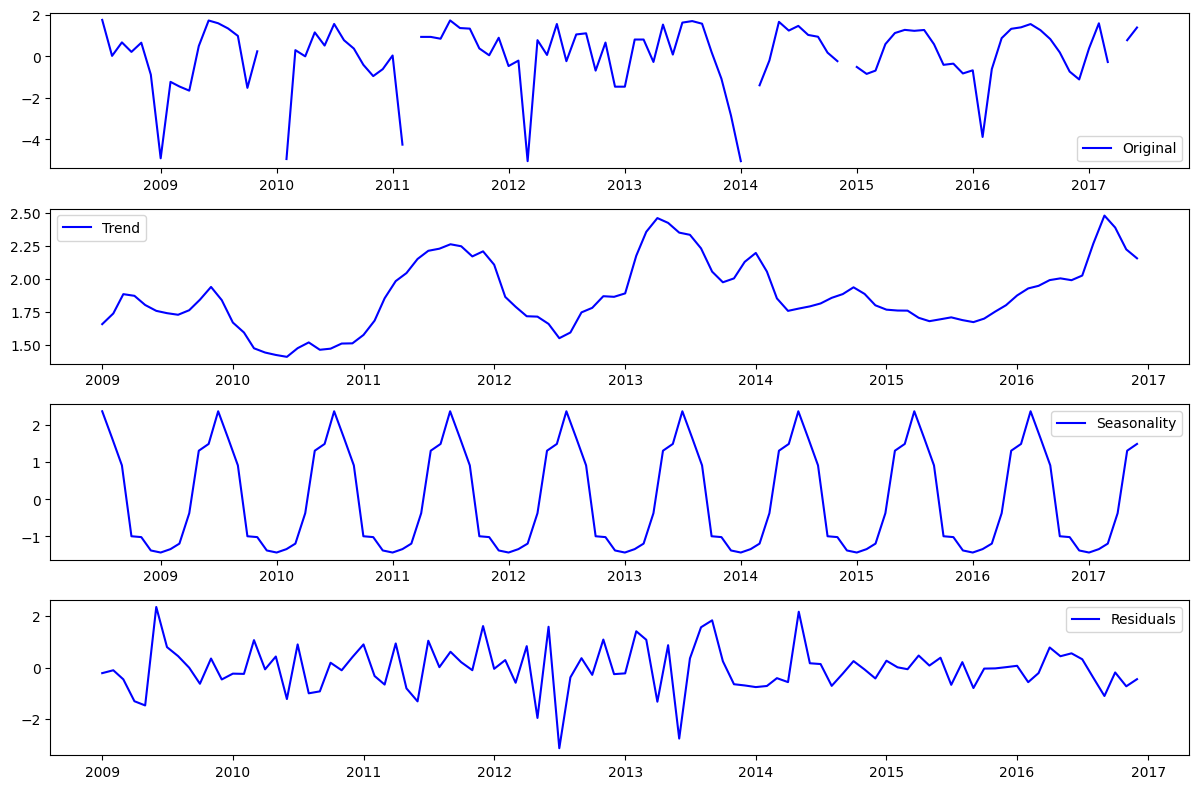

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

### Lagged Autocorrelation

In [53]:
# Shifting the index by 12 periods
# This compares data by one year, January 2009 is compared to January 2010 and so on
ts_shift = ts.shift(periods=12)

# concatenating the shifted time series and the original time series
lag_12 = pd.concat([ts_shift, ts], axis=1)

# Finding the autocorrelation
lag_12.corr()

,Rainfall,Rainfall
Rainfall,1.000000,0.547896
Rainfall,0.547896,1.000000


<AxesSubplot: xlabel='Date'>

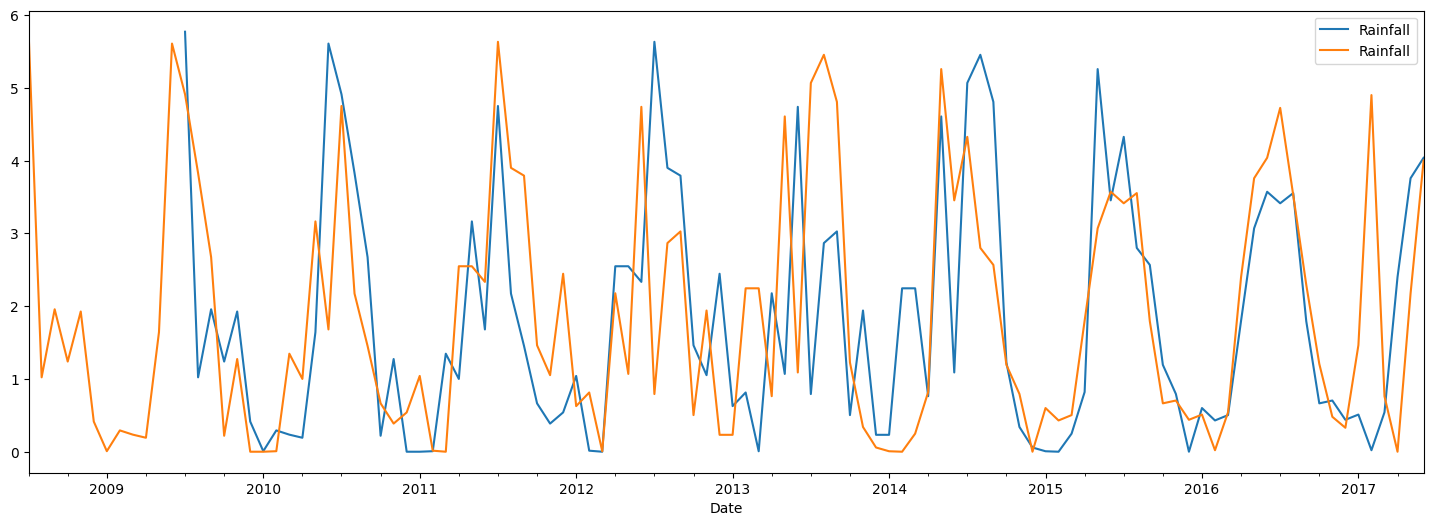

In [54]:
# Plotting the lags together
lag_12.plot(figsize=(18,6))

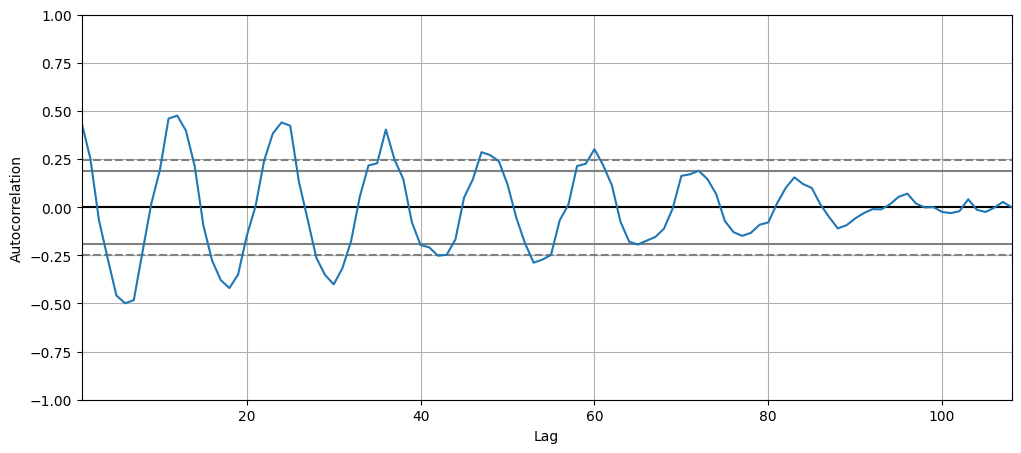

In [55]:
# Using the Autocorrelation function
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(ts);

Rainfall is definitely correlated for lags that are multiple of 12 and 24. The dotted line shows the level of significance and for lags beyond 60 the time series is not significant.

#### Partial Autocorrelation

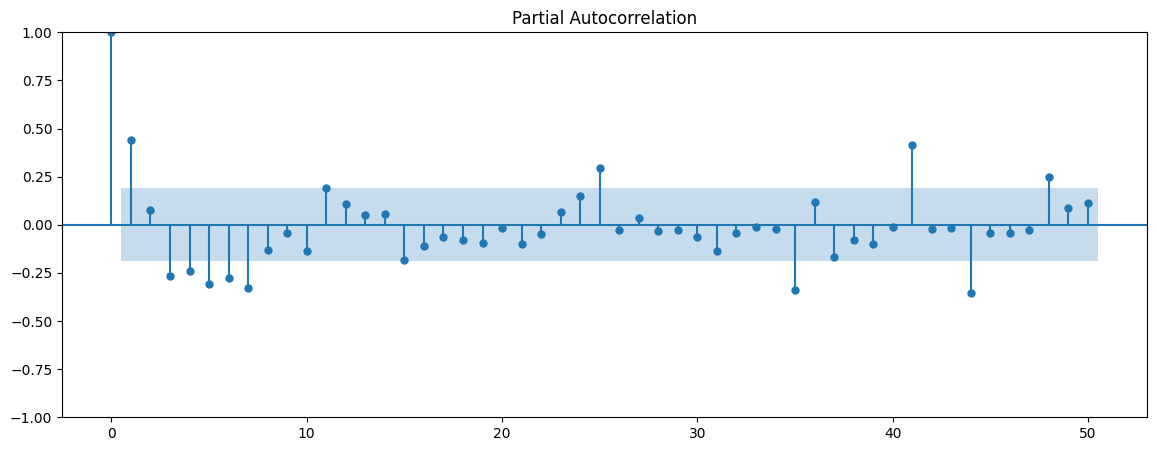

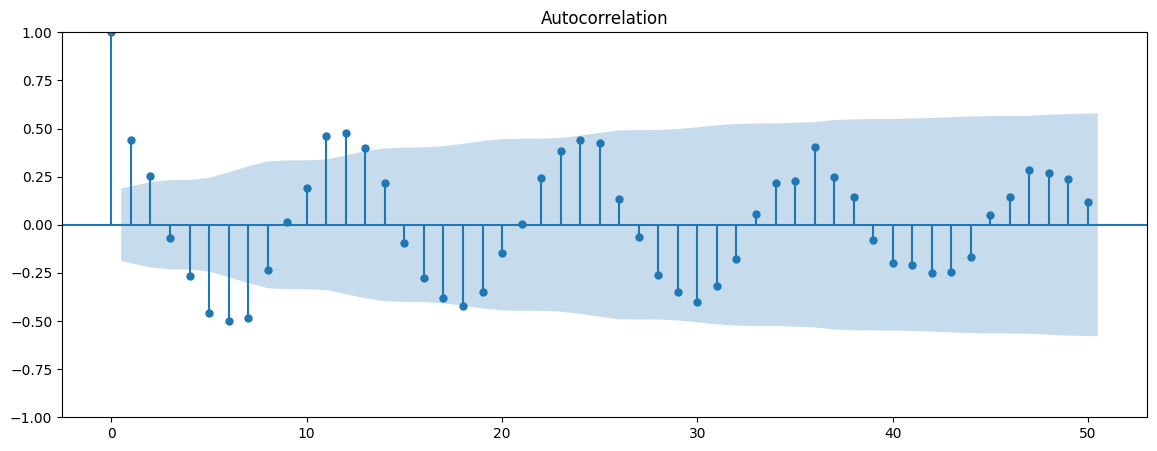

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(ts, lags=50);
plot_acf(ts, lags=50);

## ARIMA Model

p = 1 because in the pacf, the first lag is outside the significance region.

q = 1 bacause only one lag is outside the region of significance.

d = 0, no differencing was used.

In [57]:
ts_train = ts['2008-07-01':'2015-05-01']
ts_test = ts['2015-06-01':'2017-06-01']

In [58]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARIMA(ts_train, order=(1,1,0))

# Fit the model to data
arma = mod_arma.fit()

# Print out summary information on the fit
print(arma.summary())

                               SARIMAX Results                                
Dep. Variable:               Rainfall   No. Observations:                   83
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -157.912
Date:                Mon, 06 Feb 2023   AIC                            319.823
Time:                        12:26:23   BIC                            324.637
Sample:                    07-01-2008   HQIC                           321.756
                         - 05-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3903      0.107     -3.652      0.000      -0.600      -0.181
sigma2         2.7500      0.371      7.417      0.000       2.023       3.477
Ljung-Box (L1) (Q):                   0.38   Jarque-

In [59]:
arma_preds = arma.predict(start='2015-06-01', end='2017-06-01')
arma_score = mean_squared_error(ts_test, arma_preds)

arma_score


2.938012181711421

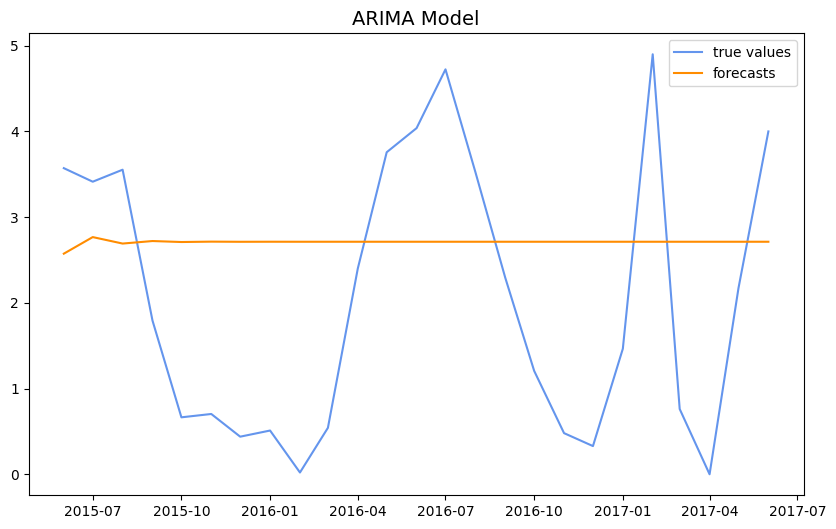

In [60]:
plt.figure(figsize = (10,6))
plt.plot(ts_test, label = "true values", color = "cornflowerblue")
plt.plot(arma_preds,label = "forecasts", color='darkorange')
plt.title("ARIMA Model", size = 14)
plt.legend(loc = 'best')
plt.show()

This model does not seem to work well

## Feature Selection
> In this phase we look at the correlation and decide which features to select for the modelling.

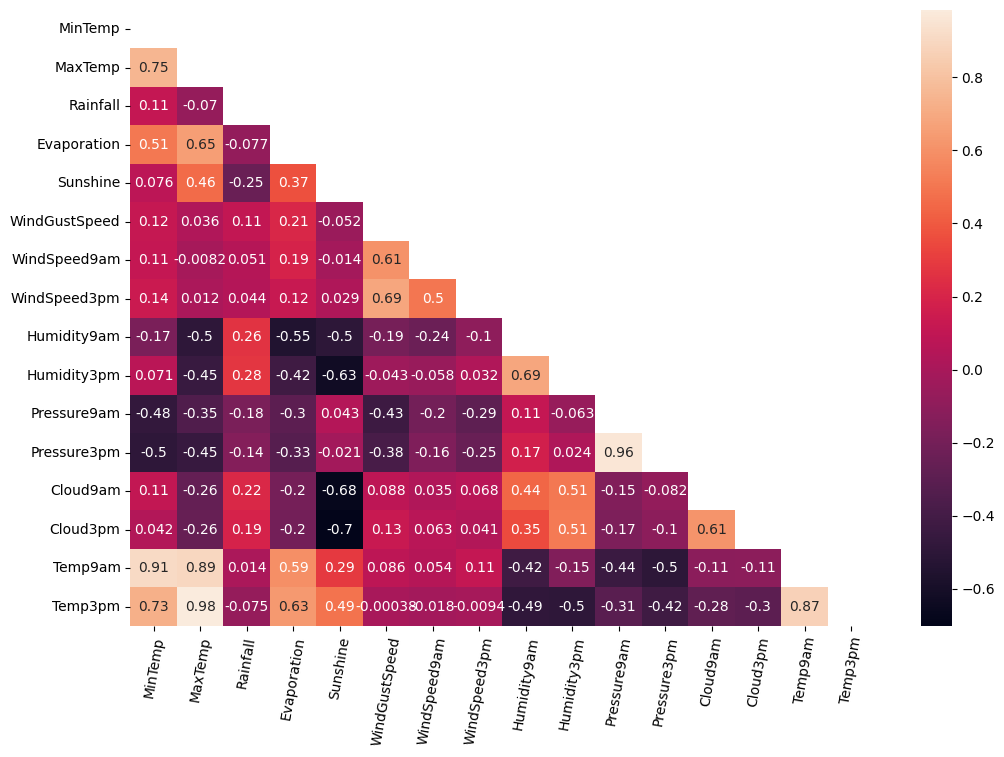

In [61]:
# Creating the mask
def corr_plot(data):
    """ Plotting the correlation matrix"""
    data_corr = data.corr()
    # Creating the mask
    mask = np.triu(np.ones_like(data_corr, dtype=bool))

    # Plotting the correlation matrix
    plt.figure(figsize=(12,8))
    sns.heatmap(data_corr, annot= True, mask=mask)
    plt.xticks(rotation=80)
    plt.show()
    
corr_plot(df1)

In [62]:
# creating a function that checks for correlation
def corr_check(data):
    
    data_corr = data.corr().abs().stack().reset_index().sort_values(0, ascending = False)
    data_corr['pairs'] = list(zip(data_corr['level_0'], data_corr['level_1']))
    data_corr.set_index(['pairs'], inplace = True)

    #dropping the level_i columns
    data_corr.drop(columns = ['level_0', 'level_1'], inplace = True)

    #add correlation column
    data_corr.columns = ['cc']

    #dropping duplicates
    data_corr.drop_duplicates(inplace = True)

    #correlations over .75, but less than 1. = multicollinarity
    return data_corr[(data_corr['cc'] > 0.75) & (data_corr['cc'] < 1)]

# checking correlation
corr_check(df1)

,cc
pairs,
"(Temp3pm, MaxTemp)",0.984841
"(Pressure9am, Pressure3pm)",0.961538
"(Temp9am, MinTemp)",0.906295
"(MaxTemp, Temp9am)",0.893387
"(Temp3pm, Temp9am)",0.870620


The columns `MaxTemp`, `Temp9am`, `Pressure9am` and `Pressure3pm` show high correlation with other features.

The study will drop `MaxTemp`, `Temp9am`, and `Pressure3pm`.

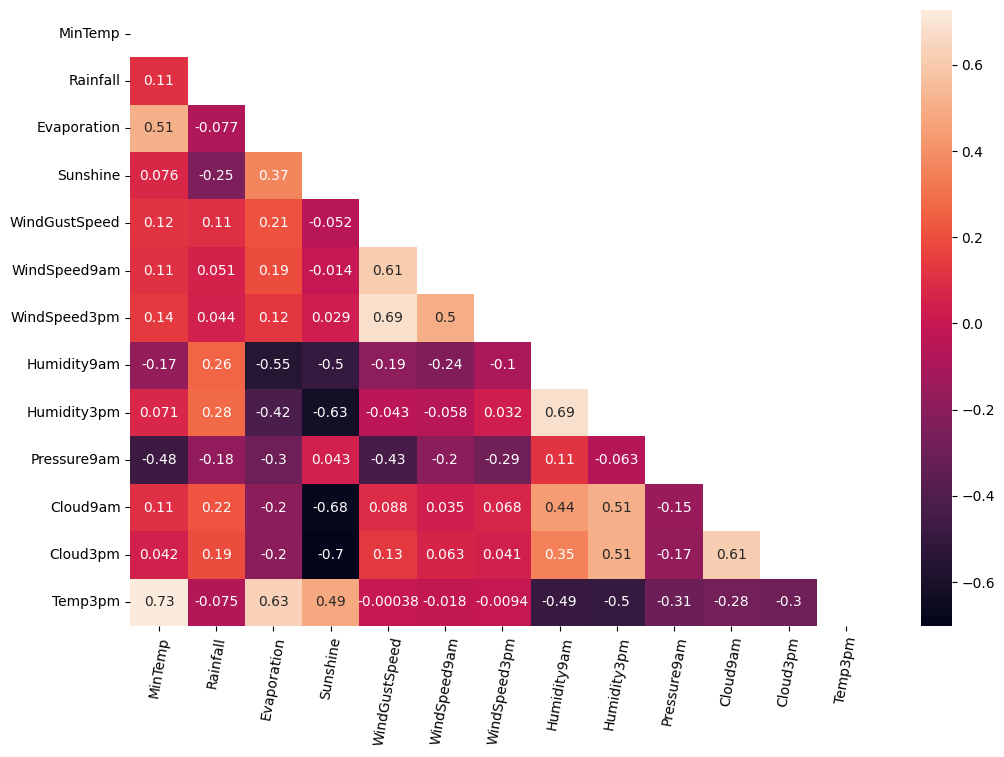

In [63]:
# Dropping the above columns
new_df = df1.drop(['MaxTemp', 'Temp9am', 'Pressure3pm'], axis =1)

# Checking for correlation once more
corr_check(new_df)
corr_plot(new_df)

All correlations are now below 0.75 and we can confidently state that high correlation between the features has been eliminated.

## Modelling

### Data Preprocessing for modelling

In [64]:
for col in ['RainToday', 'RainTomorrow']:
    df1[col] = df[col].replace({"No":0, "Yes":1})

In [65]:
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0.0,0.0
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0.0,0.0
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0.0,0.0
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0.0,0.0


In [66]:
X = df1.drop(['RainTomorrow', 'Date'], axis=1)
y = df1['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [67]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
117920,PerthAirport,16.1,22.2,0.0,6.4,5.8,SW,35.0,S,W,...,22.0,60.0,46.0,1020.2,1019.1,7.0,4.0,18.2,20.8,0.0
68973,Melbourne,11.0,16.8,6.2,3.6,6.1,SW,69.0,WNW,W,...,26.0,66.0,36.0,1007.4,1007.9,3.0,7.0,12.0,16.7,1.0
70596,Mildura,2.2,14.0,0.4,4.0,9.1,S,30.0,SW,SSE,...,13.0,85.0,37.0,1022.3,1022.9,0.0,1.0,5.9,13.4,0.0
119584,PerthAirport,12.7,19.3,3.8,3.6,0.5,N,26.0,N,N,...,13.0,96.0,73.0,1023.6,1021.1,8.0,8.0,15.1,18.8,1.0
105976,Woomera,21.5,37.7,0.0,13.4,12.5,N,37.0,ENE,W,...,4.0,21.0,12.0,1017.4,1014.1,0.0,2.0,28.3,36.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119161,PerthAirport,8.3,19.3,9.6,0.8,8.3,SE,28.0,E,ESE,...,13.0,81.0,48.0,1022.1,1021.8,1.0,1.0,14.5,18.9,1.0
140143,Darwin,17.6,30.7,0.0,4.8,11.2,E,37.0,E,E,...,13.0,46.0,30.0,1015.6,1011.8,2.0,3.0,22.1,29.7,0.0
100693,MountGambier,10.3,18.2,0.2,3.2,2.0,SSE,24.0,SSE,SE,...,7.0,78.0,57.0,1024.4,1022.9,6.0,7.0,14.0,17.6,0.0
9433,CoffsHarbour,18.9,28.2,0.0,7.0,7.1,SSW,37.0,SSW,SSE,...,17.0,77.0,73.0,1017.0,1016.1,7.0,2.0,25.3,26.9,0.0


In [68]:
col_trans = ColumnTransformer(
        [
          ("Location", OneHotEncoder(), ["Location"]),
          ("WindGustDir", OneHotEncoder(), ['WindGustDir']),
          ("WindDir9am", OneHotEncoder(), ['WindDir9am']),
          ('WindDir3pm', OneHotEncoder(), ['WindDir3pm']),
        ],
      remainder=StandardScaler()
    )

# logistic regression parameter grid
lr_grid = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [1, 10, 100],
    'clf__class_weight':['balanced', 'auto'],
    'clf__solver': ['liblinear', 'lbfgs'],
    'clf': [LogisticRegression()]
}

# Knn parameter grid
knn_grid = {
    'clf__n_neighbors':[3, 7, 9],
    'clf__weights':['uniform', 'distance'],
    'clf__metric':['minkowski', 'manhattan'],
    'clf': [KNeighborsClassifier()]
}

# random forest parameter grid
rf_grid = {
    'clf__n_estimators': [100, 250],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [10, 40],
    'clf': [RandomForestClassifier()] 
}

# Ada boost parameter grid
ada_boost_grid = {
    'clf__n_estimators': [100, 250],
    'clf__learning_rate': [0.1, 0.2, 0.8],
    'clf': [AdaBoostClassifier()]
}

# XG boost parameter grid
xg_boost_grid = {
    'clf__n_estimators': [100, 250],
    'clf__max_depth': [5, 10, 25],
    'clf__tree_method':['gpu_hist'],
    'clf': [XGBClassifier()]
}

params = [lr_grid, knn_grid, rf_grid, ada_boost_grid, xg_boost_grid]

In [69]:
# Using column transformer and a regression method inside a pipeline
pipe_clf = Pipeline([
  (
    "FeatureEngineering",
    ColumnTransformer(
        [
          ("Location", OneHotEncoder(), ["Location"]),
          ("WindGustDir", OneHotEncoder(), ['WindGustDir']),
          ("WindDir9am", OneHotEncoder(), ['WindDir9am']),
          ('WindDir3pm', OneHotEncoder(), ['WindDir3pm']),
        ],
      remainder=StandardScaler()
    )
  ),
  ("clf", LogisticRegression())
  
])

In [70]:
# Using grid search
gs = GridSearchCV(estimator = pipe_clf,
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = 5,
                  n_jobs=-1)

# fitting the grid search to the data
best_model = gs.fit(X_train, y_train)
best_model

In [111]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
accuracy_score(y_test, test_preds)

0.8600378116507149

In [89]:
# Define function to get evaluation scores and plot a confusion matrix
def score_model(model, y_test_true, X_test):
    """ A function that returns scores of a model as well as a confusion matrix"""
    
    y_pred = model.predict(X_test)
    
    precision, recall, fscore, train_support = score(y_test_true, y_pred, pos_label=1, average='binary')
    print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(accuracy_score(y_test_true,y_pred), 3)))
    
    # Create a confusion matrix 
    cm = confusion_matrix(y_test_true, y_pred)

    # Make a Dataframe, of the metrics with classes
    class_label = ["No", "Yes"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

    # Plot the Model
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Precision: 0.774 / Recall: 0.524 / F1-Score: 0.625 / Accuracy: 0.86


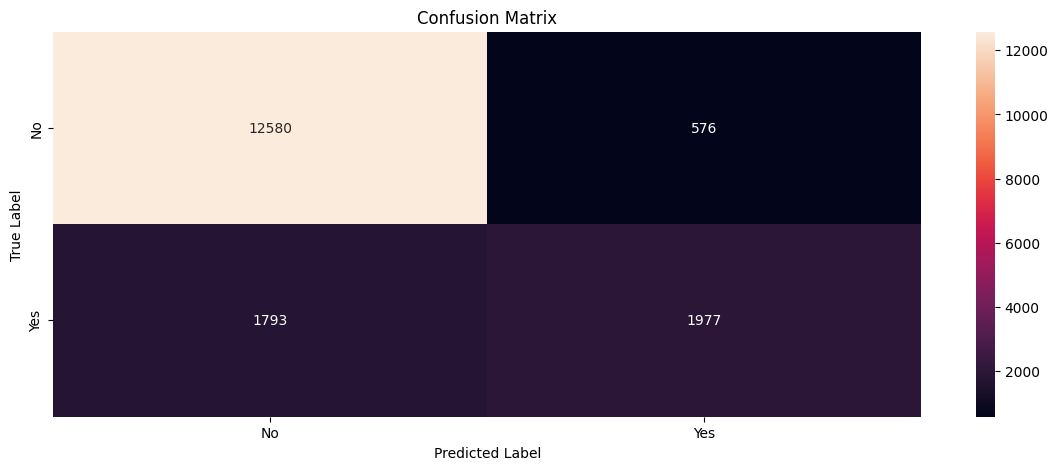

In [113]:
rf_score = score_model(model, y_test, X_test)
rf_score

In [114]:
from cuML import RandomForestClassifier

ModuleNotFoundError: No module named 'cuML'